## Precipitation Analysis

In [1]:
# #installing the necessary modules
# !pip install --user xarray
# !python -m pip install --user basemap
# !pip install folium
# !pip install cartopy
# !pip install --user metpy
# !pip install basemap
# conda install -c conda-forge pyproj
# !pip install netCDF4 h5netcdf
# !pip install netCDF4

In [2]:
#importing the libraries to be used

############################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cf
import seaborn as sns
import calendar
import warnings
############################################

# from mpl_toolkits.basemap import Basemap
#from metpy.cbook import get_test_data
# from matplotlib import cm
# import matplotlib.ticker as mticker


In [3]:
######################################
#loading the dataset5
precip = xr.open_dataset('era5_tp.nc')
precip

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 408)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-03 18:53:51 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Descriptive Statistics

### Global

In [3]:
# Select the data and retrieve the values
tp_data = precip['tp'].sel(time=slice('1991', '2023')).values

# Compute the mean
tp_mean = np.mean(tp_data)

# Compute the standard deviation
tp_std = np.std(tp_data)

# Compute the maximum
tp_max = np.max(tp_data)

# Compute the minimum
tp_min = np.min(tp_data)

# Compute the 25th percentile
tp_25 = np.percentile(tp_data, 25)

# Compute the 50th percentile (same as the median)
tp_50 = np.percentile(tp_data, 50)

# Compute the 75th percentile
tp_75 = np.percentile(tp_data, 75)

# Print or use the results
print("Mean:", tp_mean)
print("Standard Deviation:", tp_std)
print("Maximum:", tp_max)
print("Minimum:", tp_min)
print("25th Percentile:", tp_25)
print("50th Percentile:", tp_50)
print("75th Percentile:", tp_75)


Mean: 0.002408791
Standard Deviation: 0.002881438
Maximum: 0.14894485
Minimum: -7.450581e-09
25th Percentile: 0.0005045607686042786
50th Percentile: 0.001559145748615265
75th Percentile: 0.0032046735286712646


### West Africa

In [4]:
# Select the data for the West Africa region and retrieve the values
west_tp = precip.sel(longitude=slice(-20, 16), latitude=slice(18, -1))
west_tp_data = west_tp['tp'].sel(time=slice('1991', '2023')).values

# Compute the mean
west_tp_mean = np.mean(west_tp_data)

# Compute the standard deviation
west_tp_std = np.std(west_tp_data)

# Compute the minimum
west_tp_min = np.min(west_tp_data)

# Compute the maximum
west_tp_max = np.max(west_tp_data)

# Compute the 25th percentile
west_tp_25 = np.percentile(west_tp_data, 25)

# Compute the 50th percentile (same as the median)
west_tp_50 = np.percentile(west_tp_data, 50)

# Compute the 75th percentile
west_tp_75 = np.percentile(west_tp_data, 75)

# Print or use the results
print("Mean:", west_tp_mean)
print("Standard Deviation:", west_tp_std)
print("Maximum:", west_tp_max)
print("Minimum:", west_tp_min)
print("25th Percentile:", west_tp_25)
print("50th Percentile:", west_tp_50)
print("75th Percentile:", west_tp_75)


Mean: 0.0029253266
Standard Deviation: 0.003550239
Maximum: 0.051090766
Minimum: -7.450581e-09
25th Percentile: 1.817941665649414e-05
50th Percentile: 0.0015114173293113708
75th Percentile: 0.004875198006629944


## Global and West Africa Heatmaps

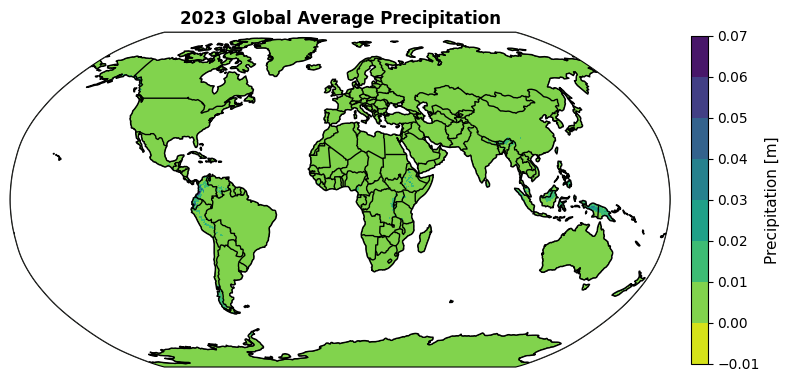

In [12]:
# Extract TP data for the year 2023
tp_2023 = precip['tp'].sel(time='2023')

# Calculate the average tp for the year 2023
tp_2023_avg = tp_2023.mean(dim='time')

def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                        cmap='viridis_r') 
                    
# ax.add_feature(cf.LAND, edgecolor='black', zorder=0)
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')



    ax.set_title(title, fontweight='bold')
    
    
    
    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=11, rotation=90)

    # Set the title passed as an argument
    plt.show()

# Call the function with the tp data for 2023 and a custom title
Global_plot(tp_2023_avg, '2023 Global Average Precipitation')


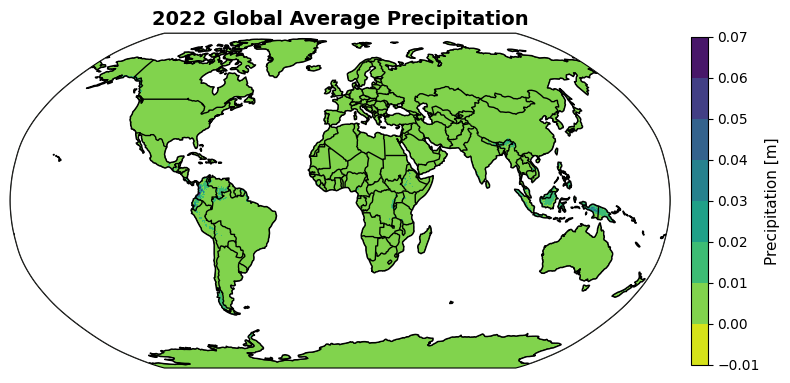

In [13]:
# Extract tp data for the year 2023
tp_2023 = precip['tp'].sel(time='2022')

# Calculate the average tp for the year 2023
tp_2023_avg = tp_2023.mean(dim='time')

def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r') 
                
# ax.add_feature(cf.LAND, edgecolor='black', zorder=0)
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')



    ax.set_title(title, fontweight='bold', fontsize = '14')
    
    
    
    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=11, rotation=90)

    # Set the title passed as an argument
    plt.show()

# Call the function with the tp data for 2022 and a custom title
Global_plot(tp_2023_avg, '2022 Global Average Precipitation')


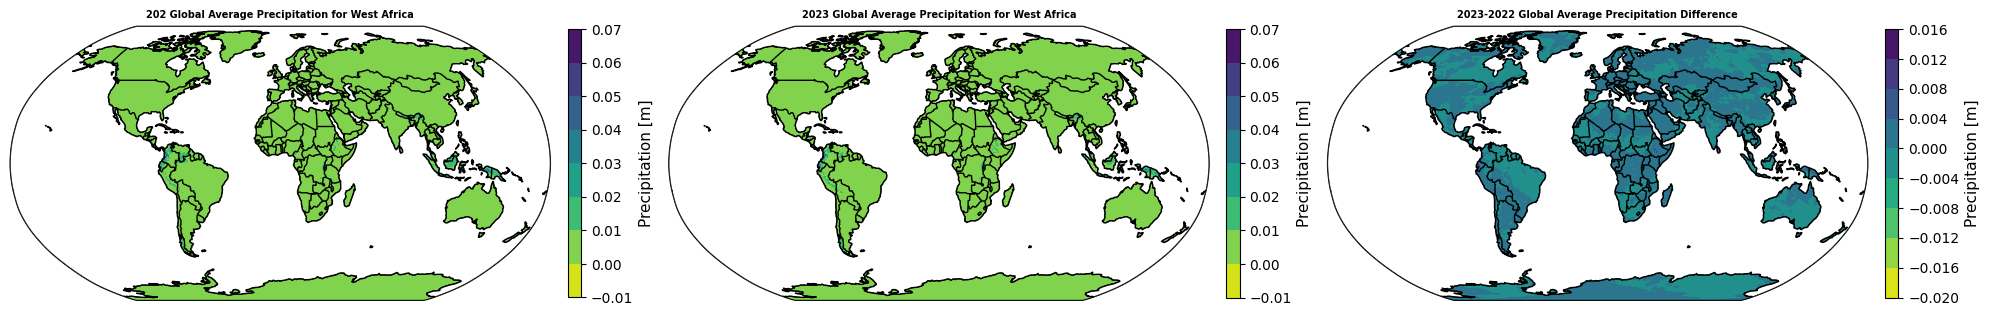

In [14]:
# Extract drought data for the year 2023
precip_tp_2022 = precip['tp'].sel(time='2022')

precip_tp_2023 = precip['tp'].sel(time='2023')

# # Calculate the average tp for the year 2023
precip_tp_2022_avg = precip_tp_2022.mean(dim='time')

precip_tp_2023_avg = precip_tp_2023.mean(dim='time')

# Calculate difference
precip_tp_diff = precip_tp_2023_avg - precip_tp_2022_avg


# Function to create a plot
def global_plot(ax, data, title):
    cs = ax.contourf(data.longitude, 
                     data.latitude, 
                     data,
                     transform=ccrs.PlateCarree(), 
#                      vmin=-0.03,
#                      vmax=0.03,
                     cmap='viridis_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')

#     ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())
    ax.set_title(title, fontweight='bold', fontsize = '7')

    cb = plt.colorbar(cs, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90)

# Create a 1 by 3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), subplot_kw={'projection': ccrs.Robinson()})

# Plot for 2022
global_plot(axs[0], precip_tp_2022_avg, '202 Global Average Precipitation for West Africa')

# Plot for 2023
global_plot(axs[1], precip_tp_2023_avg, '2023 Global Average Precipitation for West Africa')

# Plot for difference between 2023 and 2022
global_plot(axs[2], precip_tp_diff, '2023-2022 Global Average Precipitation Difference')

plt.tight_layout()
plt.show()


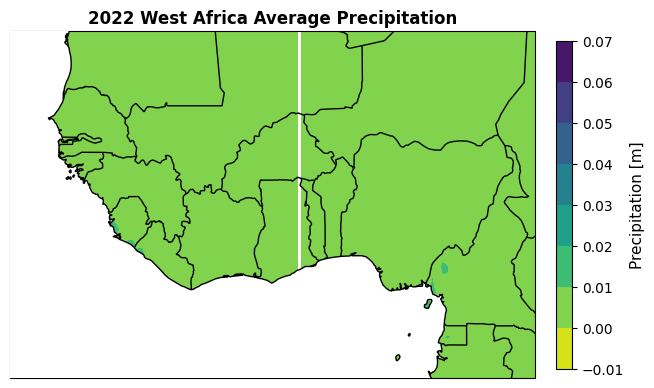

In [15]:
# Extract drought data for the year 2023
precip_tp = precip['tp'].sel(time='2022')

# # Calculate the average tp for the year 2023
precip_tp_avg = precip_tp.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
#                        vmin = -0.001,
#                        vmax = 0.001,
                       cmap='viridis_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa

    
    # Adding colorbar
    cb = plt.colorbar(cs, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=11, rotation=90)
    
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the tp data for 2022 and a custom title
Global_plot(precip_tp_avg, '2022 West Africa Average Precipitation')


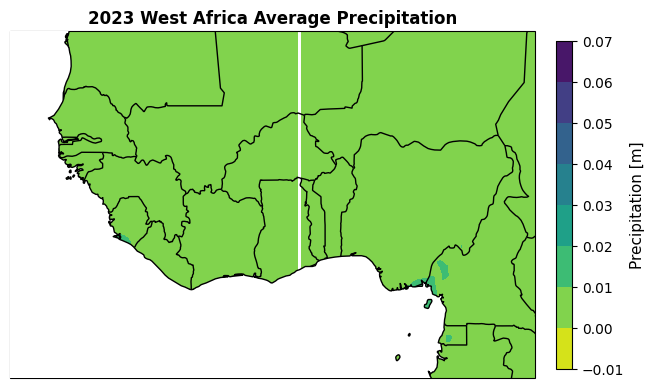

In [16]:
# Extract drought data for the year 2023
precip_tp = precip['tp'].sel(time='2023')

# # Calculate the average tp for the year 2023
precip_tp_avg = precip_tp.mean(dim='time')


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa

    
    # Adding colorbar
    cb = plt.colorbar(cs, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=11, rotation=90)
    
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the tp data for 2023 and a custom title
Global_plot(precip_tp_avg, '2023 West Africa Average Precipitation')


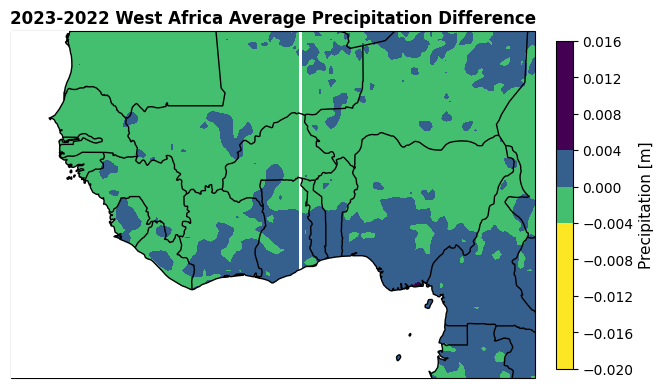

In [17]:
# Extract drought data for the year 2023
precip_tp_2022 = precip['tp'].sel(time='2022')

precip_tp_2023 = precip['tp'].sel(time='2023')

# # Calculate the average tp for the year 2023
precip_tp_2022_avg = precip_tp_2022.mean(dim='time')

precip_tp_2023_avg = precip_tp_2023.mean(dim='time')

# Calculate difference
precip_tp_avg = precip_tp_2023_avg - precip_tp_2022_avg

def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson()))

    cs = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin = -0.005,
                       vmax = 0.005,
                       cmap='viridis_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa

    
    # Adding colorbar
    cb = plt.colorbar(cs, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=11, rotation=90)
    
    
    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the tp data for 2023-2022 and a custom title
Global_plot(precip_tp_avg, '2023-2022 West Africa Average Precipitation Difference')


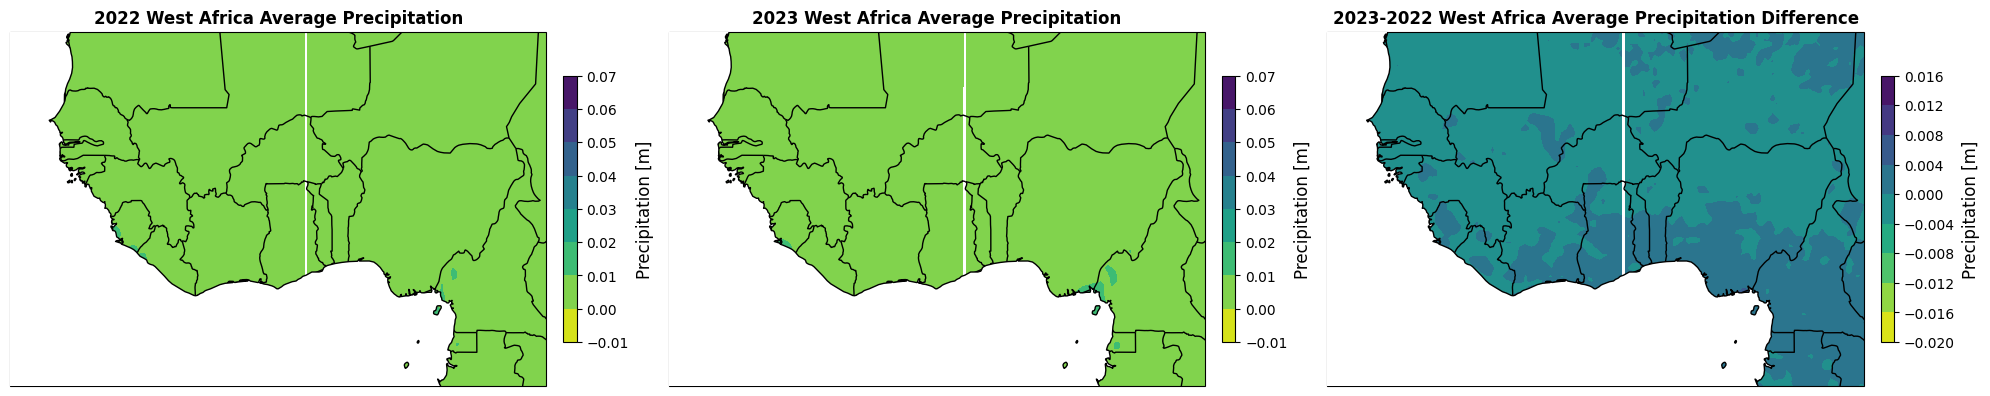

In [19]:
# Extract drought data for the year 2023
precip_tp_2022 = precip['tp'].sel(time='2022')

precip_tp_2023 = precip['tp'].sel(time='2023')

# # Calculate the average tp for the year 2023
precip_tp_2022_avg = precip_tp_2022.mean(dim='time')

precip_tp_2023_avg = precip_tp_2023.mean(dim='time')

# Calculate difference
precip_tp_diff = precip_tp_2023_avg - precip_tp_2022_avg


# Function to create a plot
def global_plot(ax, data, title):
    cs = ax.contourf(data.longitude, 
                     data.latitude, 
                     data,
                     transform=ccrs.PlateCarree(), 
#                      vmin = -0.005,
#                      vmax = 0.005,
                     cmap='viridis_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')

    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())
    ax.set_title(title, fontweight='bold')

    cb = plt.colorbar(cs, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

# Create a 1 by 3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), subplot_kw={'projection': ccrs.Robinson()})

# Plot for 2022
global_plot(axs[0], precip_tp_2022_avg, '2022 West Africa Average Precipitation')

# Plot for 2023
global_plot(axs[1], precip_tp_2023_avg, '2023 West Africa Average Precipitation')

# Plot for difference between 2023 and 2022
global_plot(axs[2], precip_tp_diff, '2023-2022 West Africa Average Precipitation Difference')

plt.tight_layout()
plt.show()


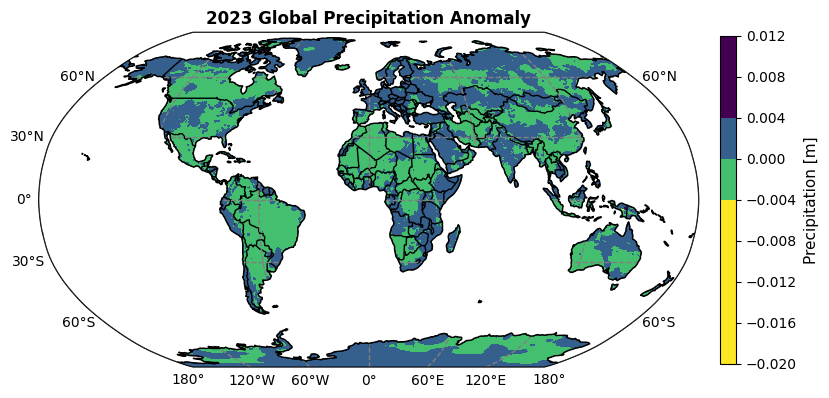

In [21]:
# Extract tp data for the year 2023
tp_2023 = precip['tp'].sel(time='2023')

#Exract the baseline data
tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020')) # Base period

# Calculate the average tp for the year 2023
tp_2023_avg = tp_2023.mean(dim='time')

# Calculate the average tp for the baseline
tp_1991_2020_avg = tp_1991_2020.mean(dim = 'time')

#calculate the anomaly
tp_anomaly = tp_2023_avg - tp_1991_2020_avg


def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='viridis_r', 
                       vmin = -0.005,
                       vmax = 0.005)
    
#                        shading='auto')
# ax.add_feature(cf.LAND, edgecolor='black', zorder=0)
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')

# Add gridlines with specific tick locations
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}


    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03, orientation='vertical')
    cb.set_label(label='Precipitation [m]', fontsize=11, rotation=90, labelpad=5)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the tp data for 2023 and a custom title
Global_plot(tp_anomaly, '2023 Global Precipitation Anomaly')


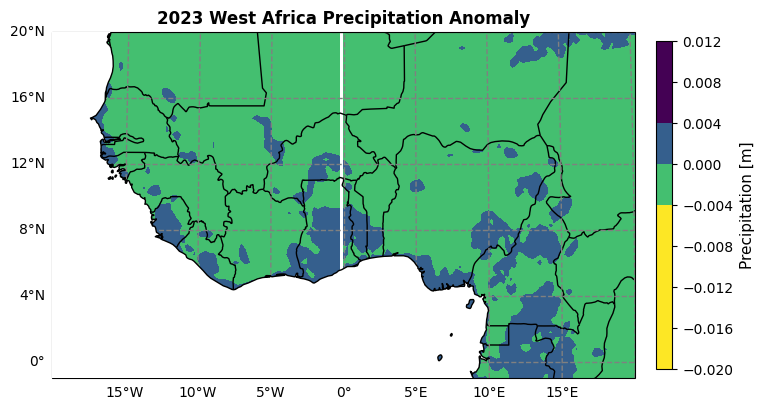

In [22]:

# Extract tp data for the year 2023
tp_2023 = precip['tp'].sel(time='2023')

# Extract the baseline data
tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020'))  # Base period

# Calculate the average tp for the year 2023
tp_2023_avg = tp_2023.mean(dim='time')

# Calculate the average tp for the baseline
tp_1991_2020_avg = tp_1991_2020.mean(dim='time')

# Calculate the anomaly
tp_anomaly = tp_2023_avg - tp_1991_2020_avg

def Global_plot(ERA5_dataset, title):
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))

    im = ax.contourf(ERA5_dataset.longitude, 
                     ERA5_dataset.latitude, 
                     ERA5_dataset,
                     transform=ccrs.PlateCarree(), 
                     cmap='viridis_r', 
                     vmin=-0.005,
                     vmax=0.005)

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')
    ax.set_extent([-20, 20, -1, 20], crs=ccrs.PlateCarree())

    # Add gridlines with specific tick locations
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = plt.MultipleLocator(5)
    gl.ylocator = plt.MultipleLocator(4)
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}


    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03, orientation='vertical')
    cb.set_label(label='Precipitation [m]', fontsize=11, rotation=90, labelpad=5)

    # Set the title passed as an argument
    ax.set_title(title, fontweight='bold')
    plt.show()

# Call the function with the tp data for 2023 and a custom title
Global_plot(tp_anomaly, '2023 West Africa Precipitation Anomaly')


### Monthly 2023 Global Precipitation Anomaly

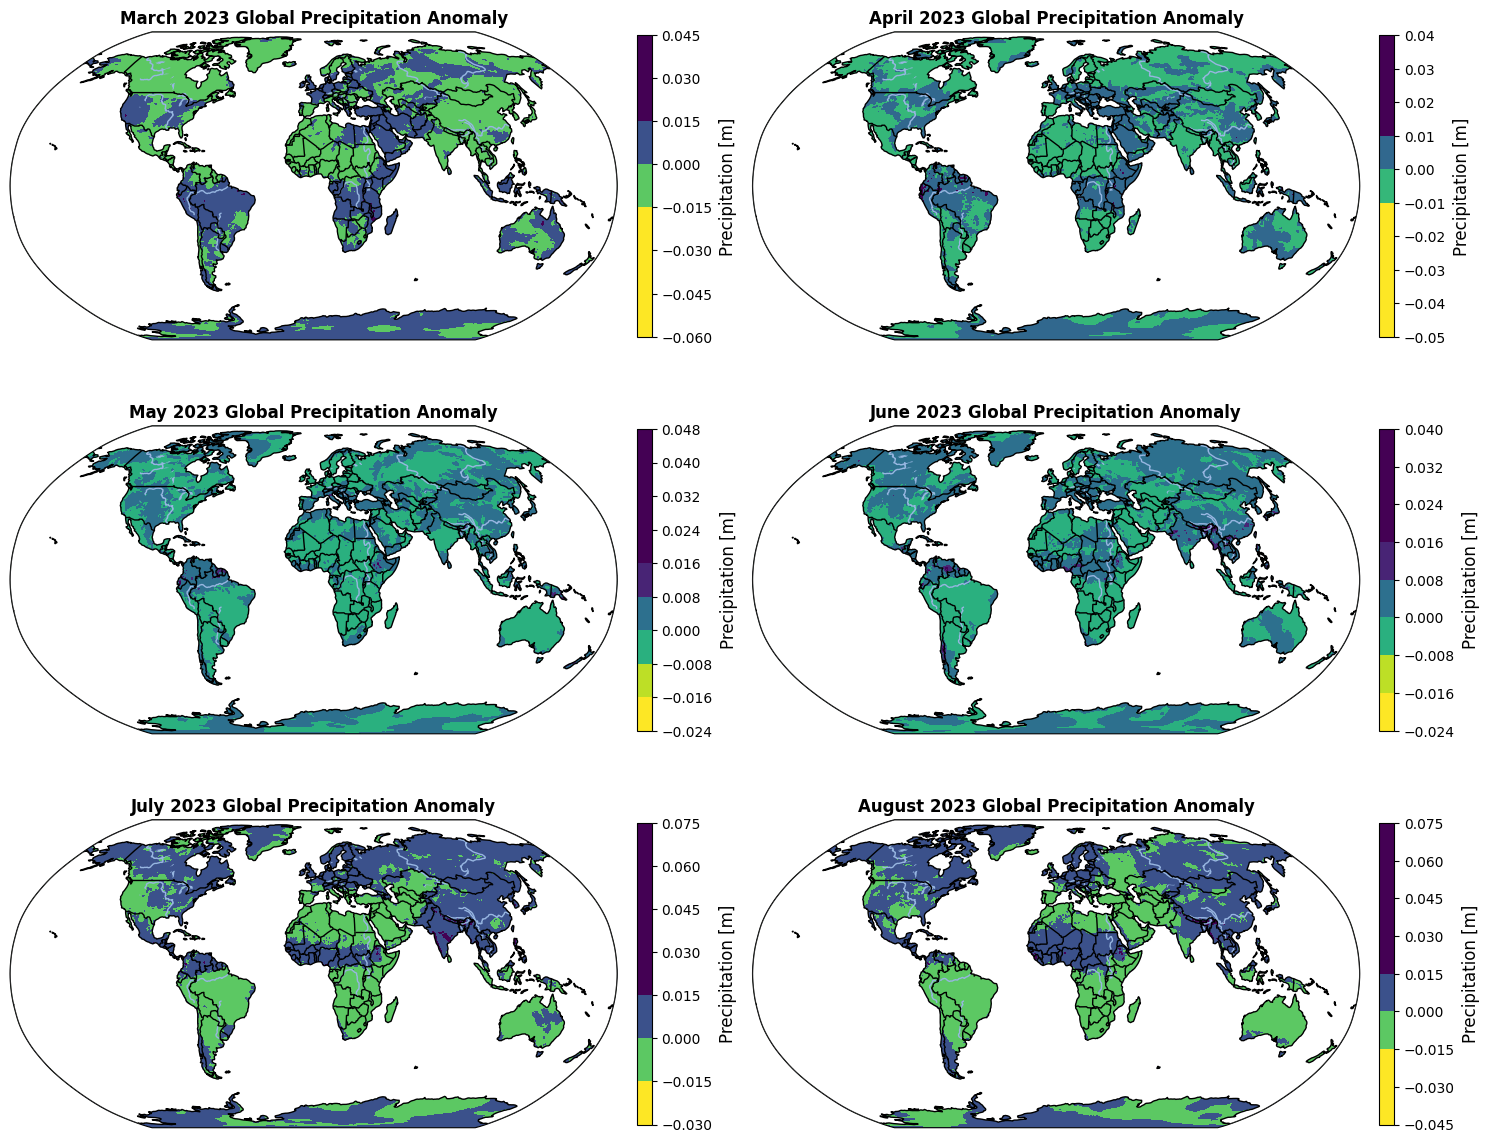

In [24]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.015,
                       vmax = 0.015,
                       cmap='viridis_r') #, 
                       #shading='auto')

    # ax.add_feature(cf.LAND, edgecolor='black', zorder=0)
    ax.add_feature(cf.RIVERS)
    ax.add_feature(cf.LAKES)
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    # ax.coastlines(resolution='110m')
    
   
    # Adding colorbar
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold')

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020')) # Base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2023 Global Precipitation Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2023 West Africa Precipitation Anomaly

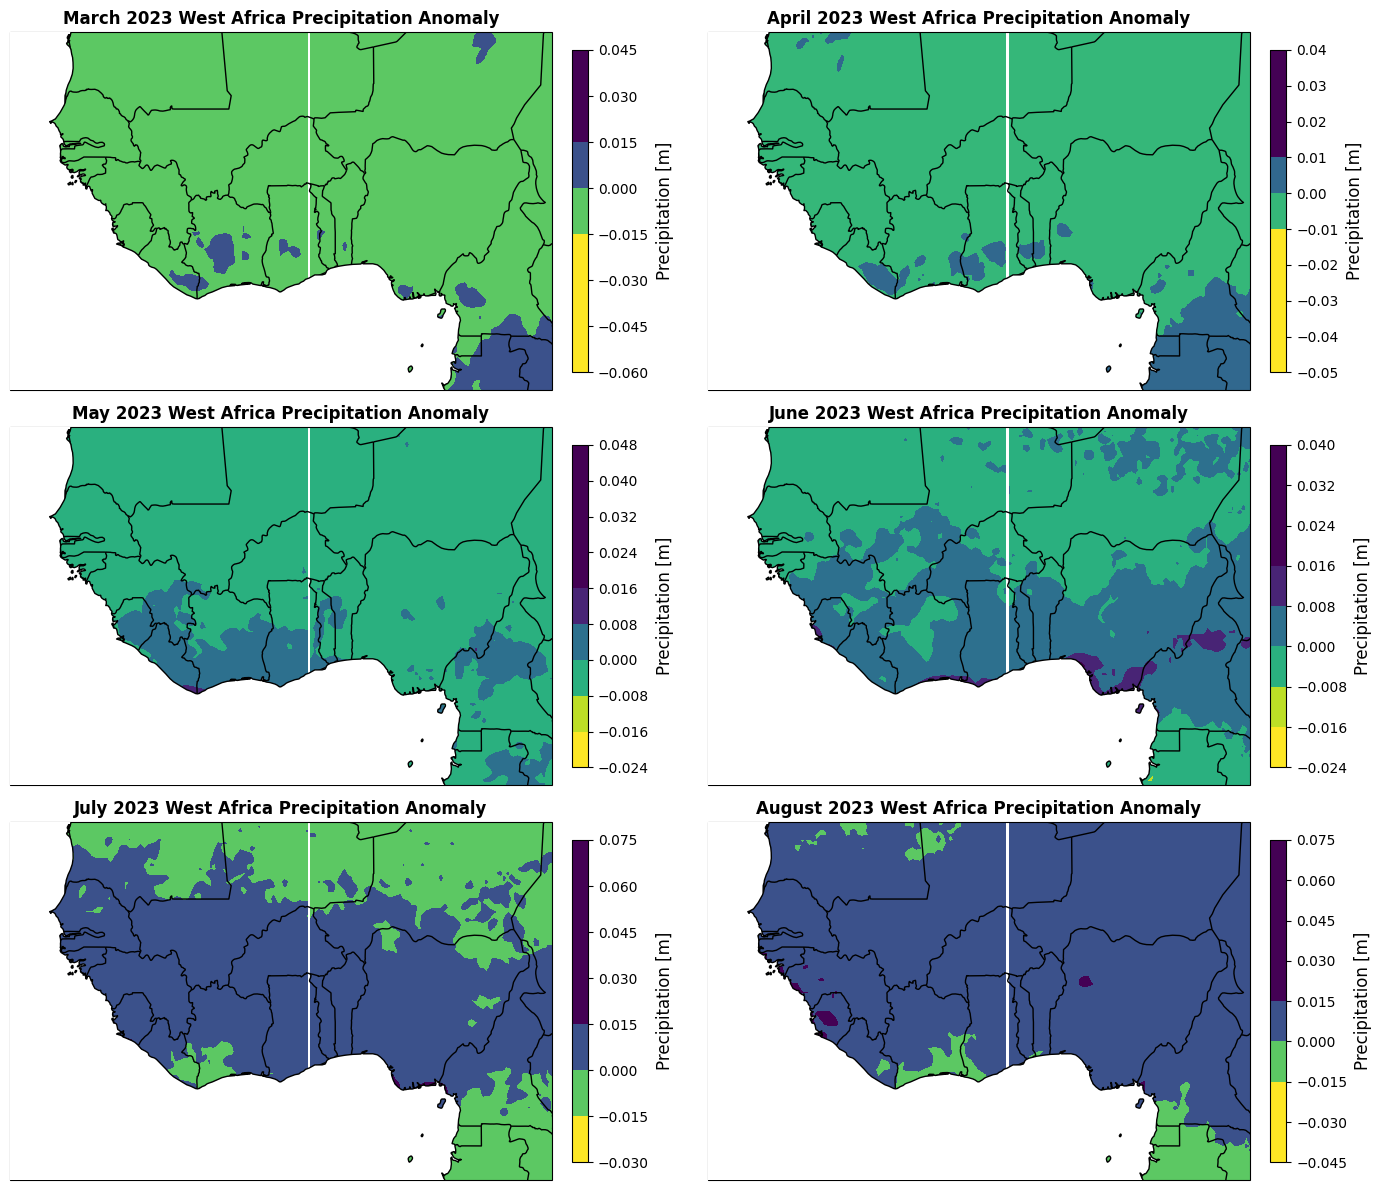

In [25]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.015,
                       vmax = 0.015,
                       cmap='viridis_r') #, 
                       #shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020')) # Base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2023 West Africa Precipitation Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2022 West Africa Precipitation Anomaly

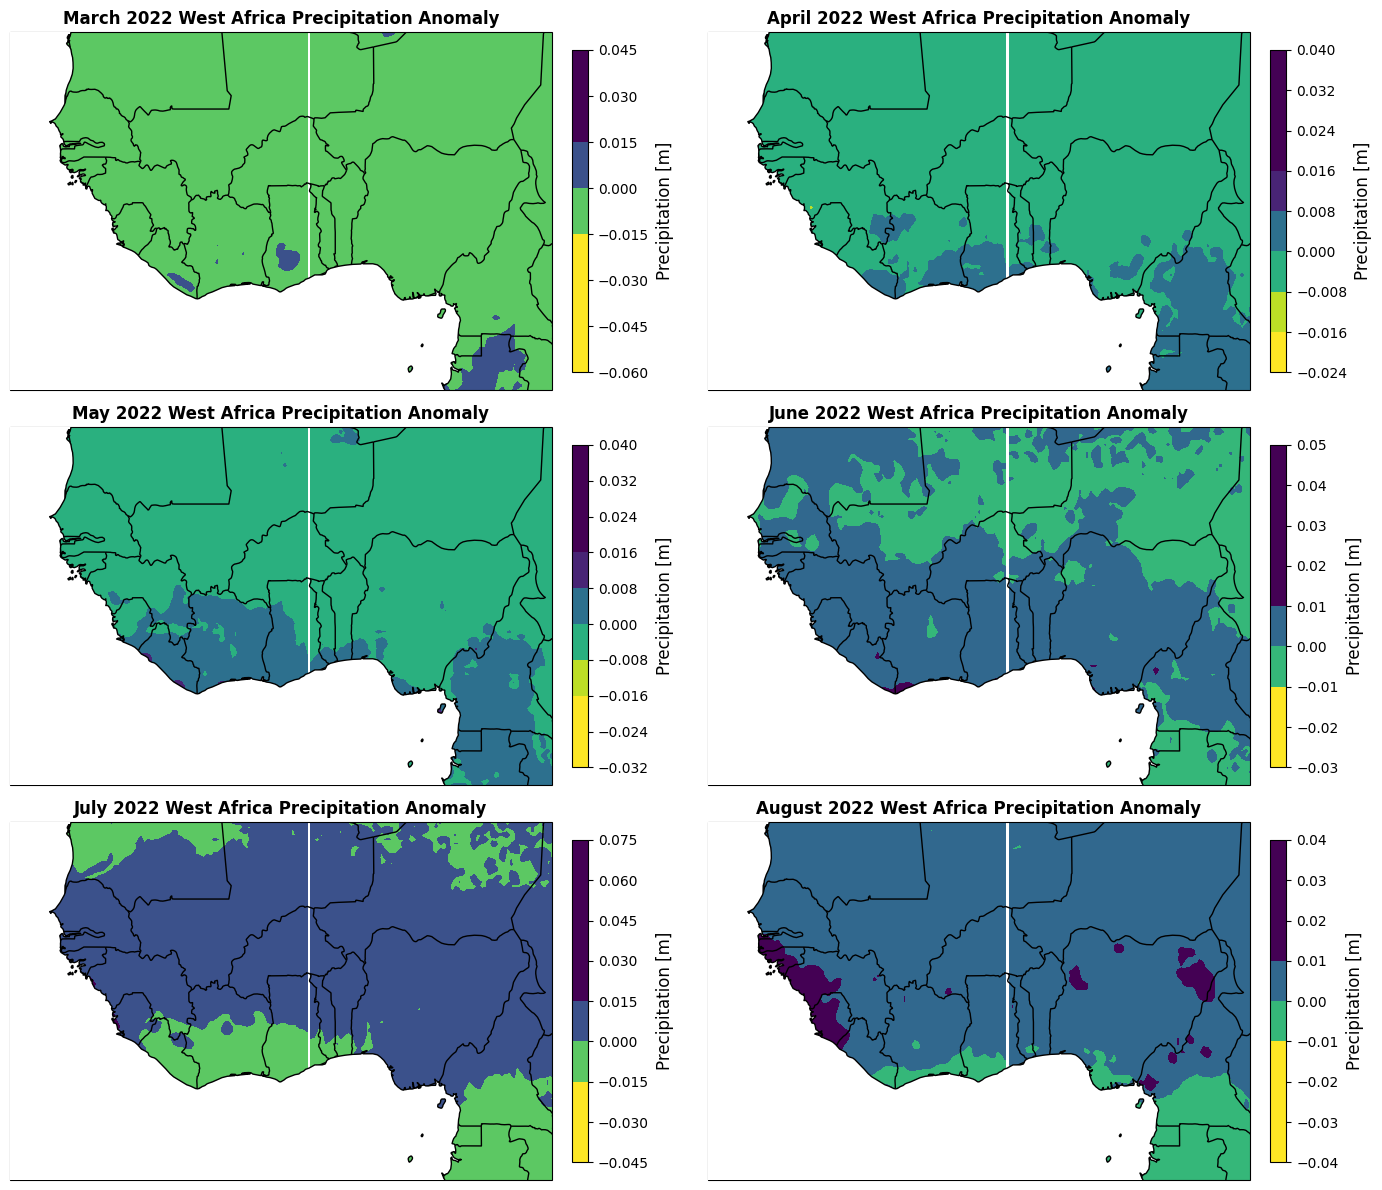

In [26]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.015,
                       vmax = 0.015,
                       cmap='viridis_r') #, 
                       #shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,  edgecolor='black', zorder=100, facecolor = 'white') #facecolor='white',
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020')) # Base period
    
    # Let's start with the current month in 2023
    current_month = '2022-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2022 West Africa Precipitation Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2021 West Africa Precipitation Anomaly

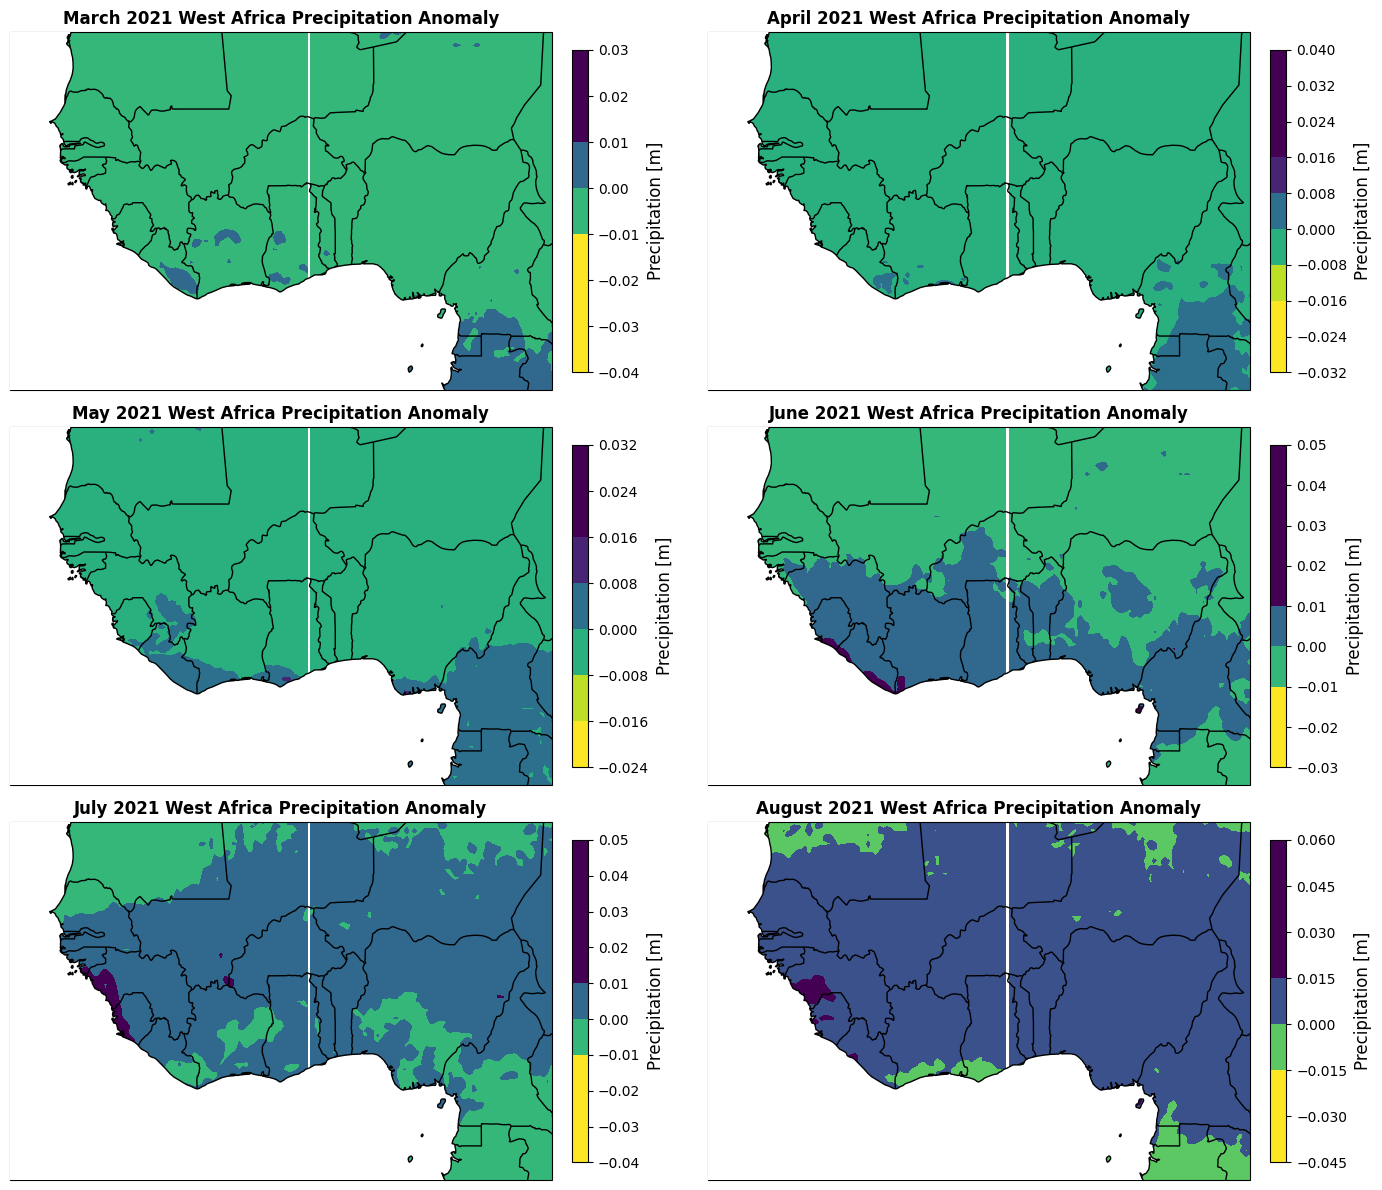

In [27]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.015,
                       vmax = 0.015,
                       cmap='viridis_r') #, 
                       #shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN,  edgecolor='black', zorder=100, facecolor = 'white') #facecolor='white',
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time=slice('1991', '2020')) # Base period
    
    # Let's start with the current month in 2023
    current_month = '2021-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2021 West Africa Precipitation Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

 ### Monthly 2023-2022 West Africa Average Precipitation Difference

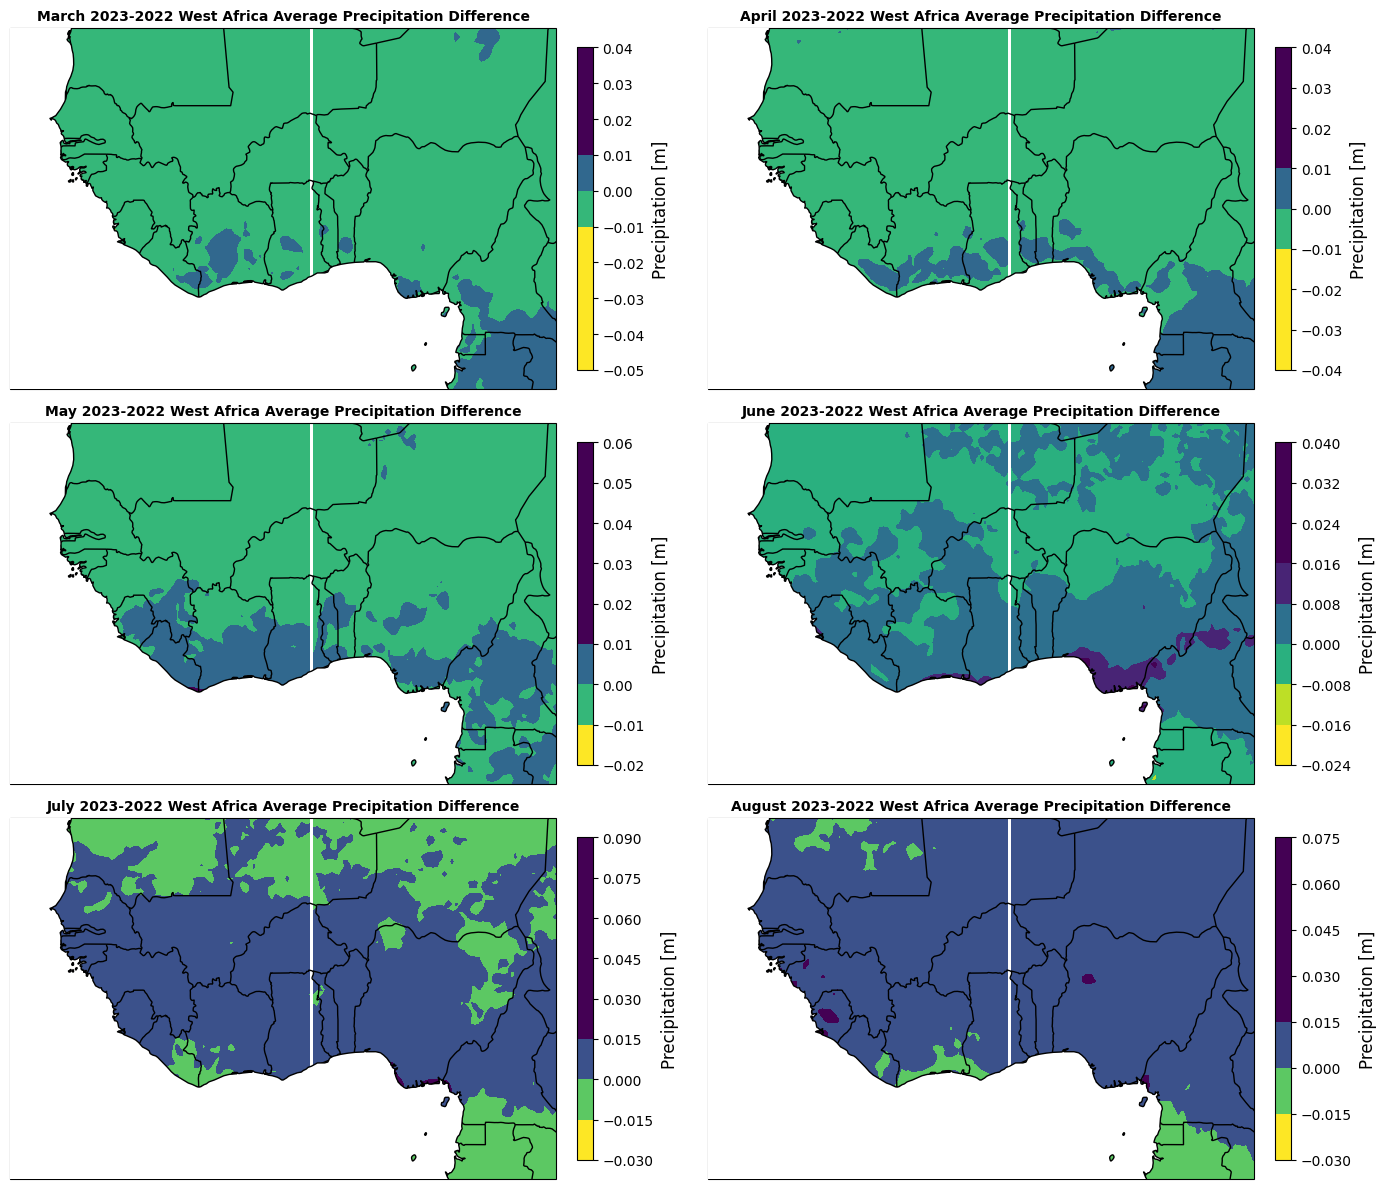

In [28]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(),
                       vmin = -0.015,
                       vmax = 0.015,
                       cmap='viridis_r') #, 
                       #shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
#     ax.add_feature(cf.OCEAN, facecolor='white', edgecolor='black', zorder=100)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    ax.add_feature(cf.OCEAN,edgecolor='black', zorder=100, facecolor = 'white')
    
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold', fontsize = '10')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time='2022') # Base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2023-2022 West Africa Average Precipitation Difference', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2023-2021 West Africa Average Precipitation Difference

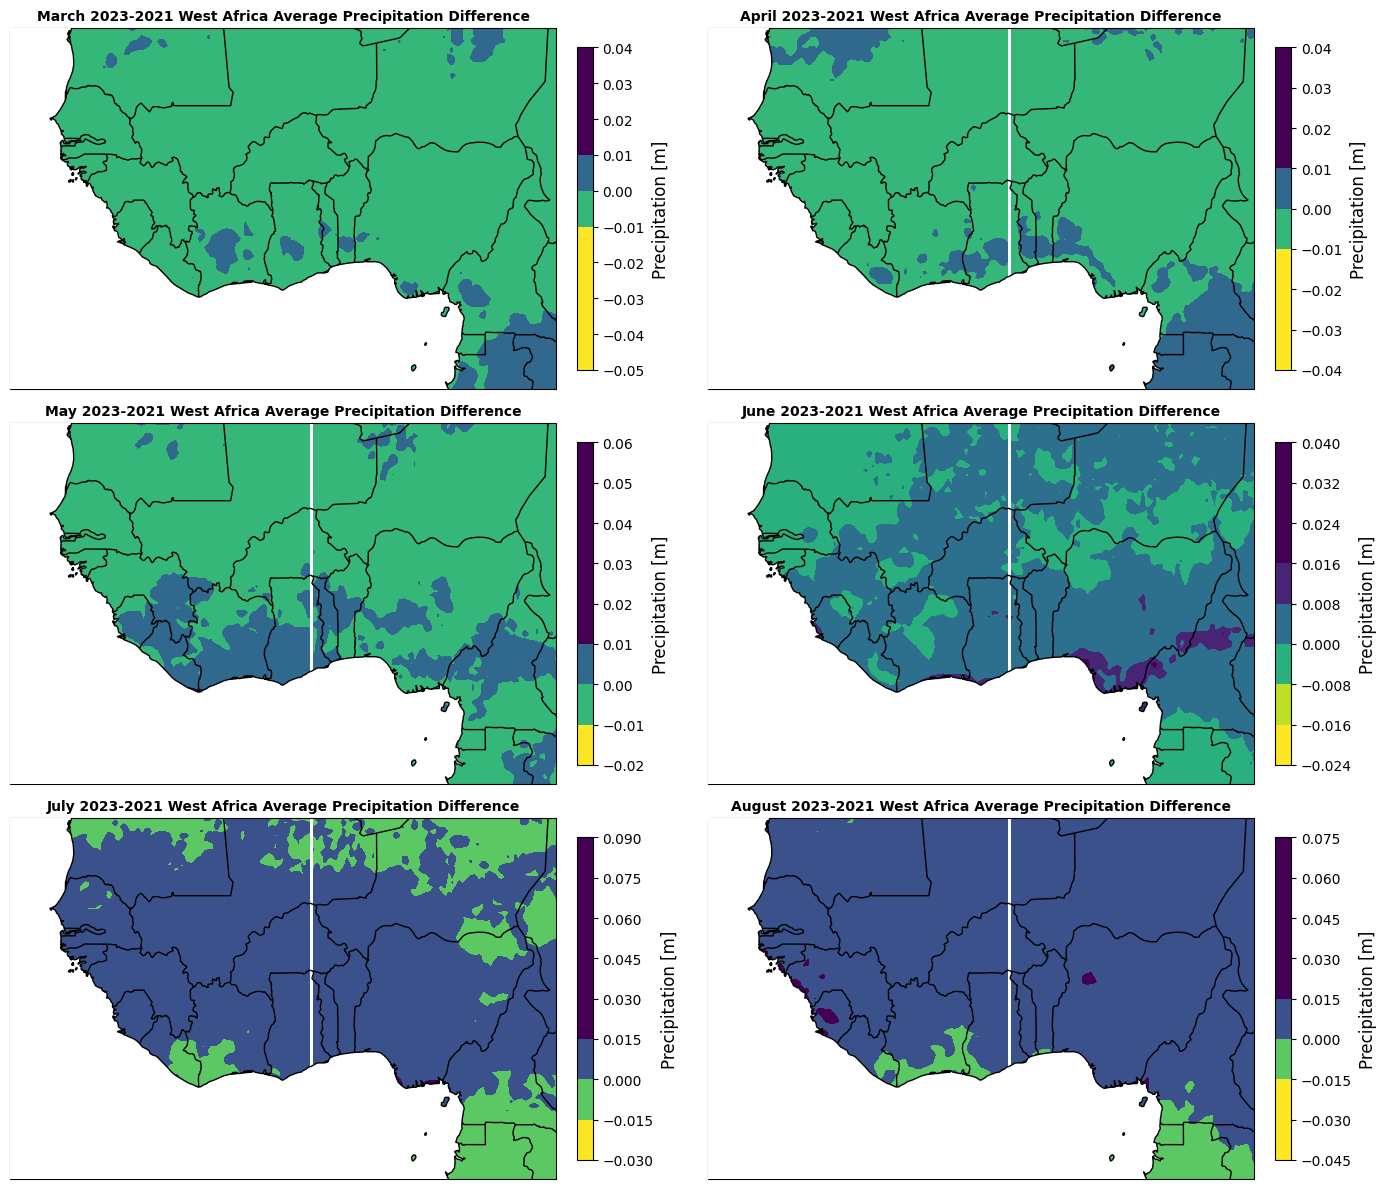

In [31]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                     ERA5_dataset.latitude, 
                     ERA5_dataset,
                     vmin = -0.015,
                     vmax = 0.015,
                     transform=ccrs.PlateCarree(), 
                     cmap='viridis_r') 

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
#     ax.add_feature(cf.OCEAN, facecolor='white', edgecolor='black', zorder=100)
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    #ax.add_feature(cf.OCEAN, edgecolor='black', zorder=10)
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Precipitation [m]', fontsize=12, rotation=90, labelpad = 5)

    ax.set_title(title, fontweight='bold', fontsize = '10')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    # Difference between the years
    # Select the specific years needed
    tp_1991_2020 = precip['tp'].sel(time='2021') # Base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    tp_month_2023 = precip['tp'].sel(time=current_month)
    
    # Calculate averages
    tp_month_2023_avg = tp_month_2023.mean(dim='time')
    tp_1991_2020_avg = tp_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    tp_diff_avg = tp_month_2023_avg - tp_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(tp_diff_avg, f'{month} 2023-2021 West Africa Average Precipitation Difference', axs[row, col])

plt.tight_layout()
plt.show()


## Global Time Series Analysis

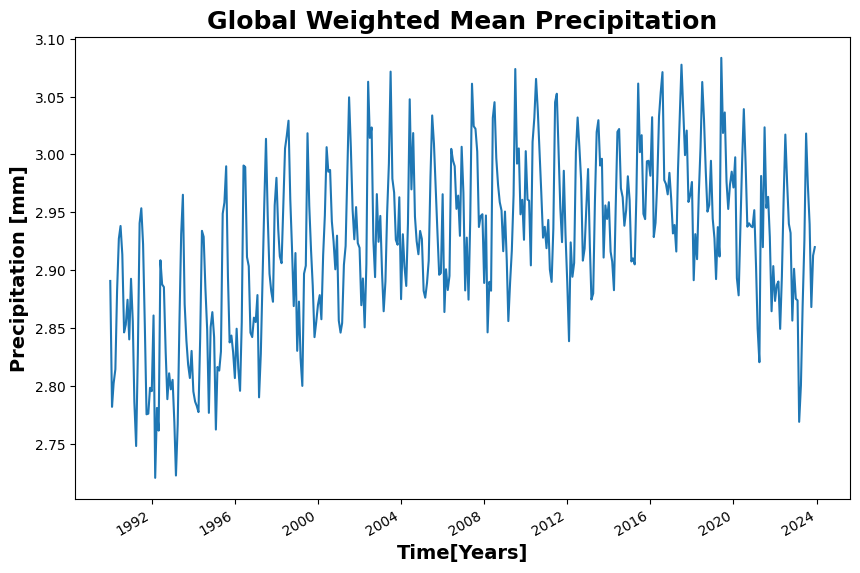

In [11]:

# Calculate weights
weights = np.cos(np.deg2rad(precip['tp'].latitude))
weights.name = "weights"

# Apply weights to the dataset
tp_weighted = precip['tp'].weighted(weights)

# Calculate the weighted mean
tp_mean = tp_weighted.mean(["longitude", "latitude"])*1000

# Plot the mean using a line plot
plt.figure(figsize=(10, 6))
tp_mean.plot()
plt.title('Global Weighted Mean Precipitation', fontweight='bold', fontsize = '18')
plt.xlabel('Time[Years]', fontweight='bold', fontsize = '14')
plt.ylabel('Precipitation [mm]', fontweight='bold', fontsize = '14')
plt.show()


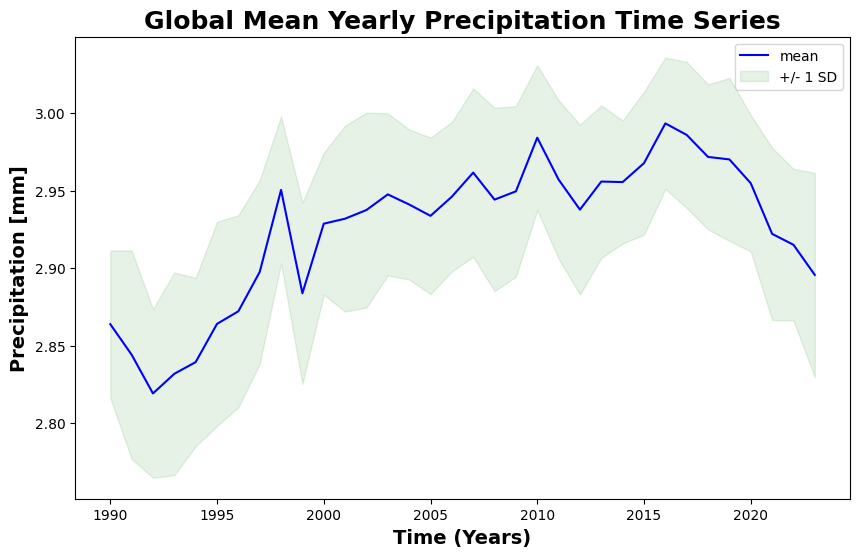

In [13]:
#calculate mean
tp_yearly = tp_mean.groupby('time.year').mean() 

#calculate standard deviation
std = tp_mean.groupby('time.year').std()

#plotting
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(tp_yearly.year, tp_yearly, color='blue', label='mean')

ax.fill_between(tp_yearly.year, (tp_yearly + std), (tp_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

plt.title('Global Mean Yearly Precipitation Time Series', fontweight='bold', fontsize = '18')
plt.ylabel('Precipitation [mm]', fontweight='bold', fontsize = '14')
plt.xlabel('Time (Years)', fontweight='bold', fontsize = '14')
plt.legend()

## Bar chart to visualize the time series of anomalies

In [14]:
tp_subset = tp_yearly.where((tp_yearly.year > 1990) & (tp_yearly.year < 2021), drop=True)
tp_clim = tp_subset.mean()
tp_anom = tp_yearly - tp_clim

df = tp_anom.to_dataframe()
df['positive'] = df['tp'] > 0
df.tail() # show only first five rows

tp  positive
year                    
2019  0.041492      True
2020  0.026133      True
2021 -0.006499     False
2022 -0.013531     False
2023 -0.032981     False

Text(0, 0.5, 'Precipitation [m]')

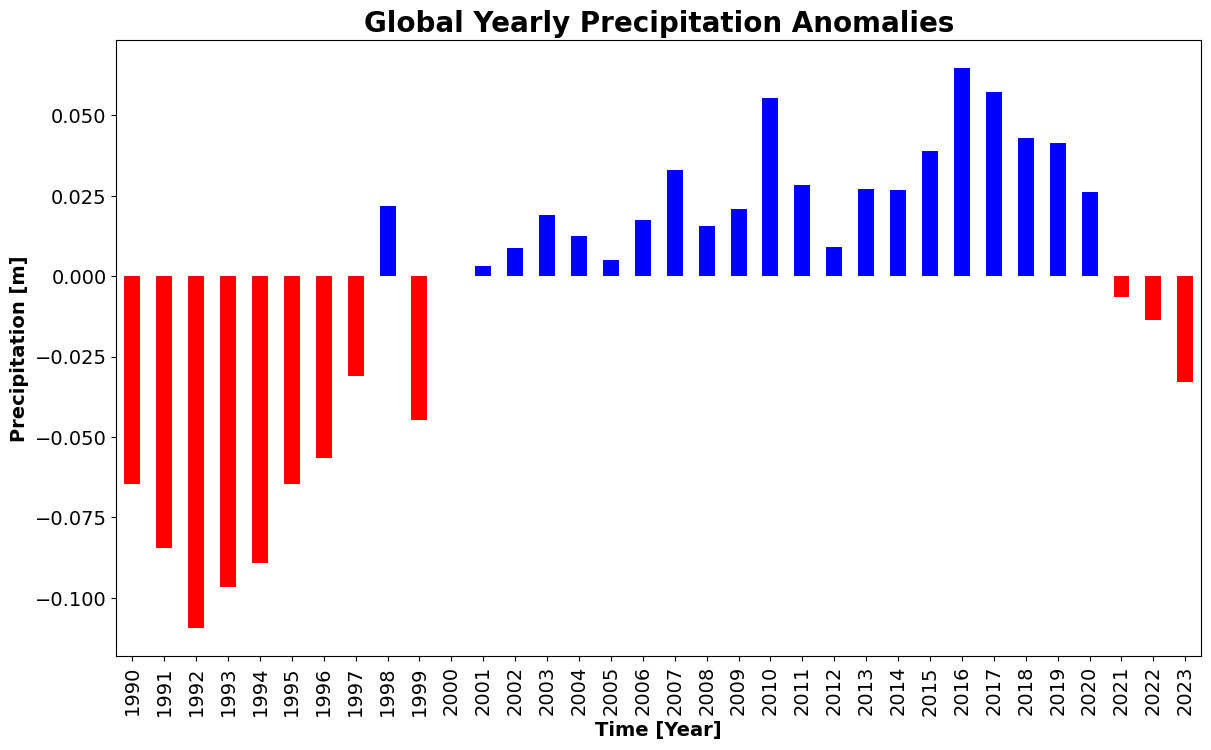

In [15]:
plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['tp'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'blue', False: 'red'}),
    fontsize=14
)

# Set the title 
ax.set_title('Global Yearly Precipitation Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize=14)
ax.set_ylabel('Precipitation [m]', fontweight='bold', fontsize=14)
#plt.savefig(f'{DATADIR}Arctic_t2m_anom_bar.png') #(reference period 1991-2020)

## West Africa Time Series Analysis

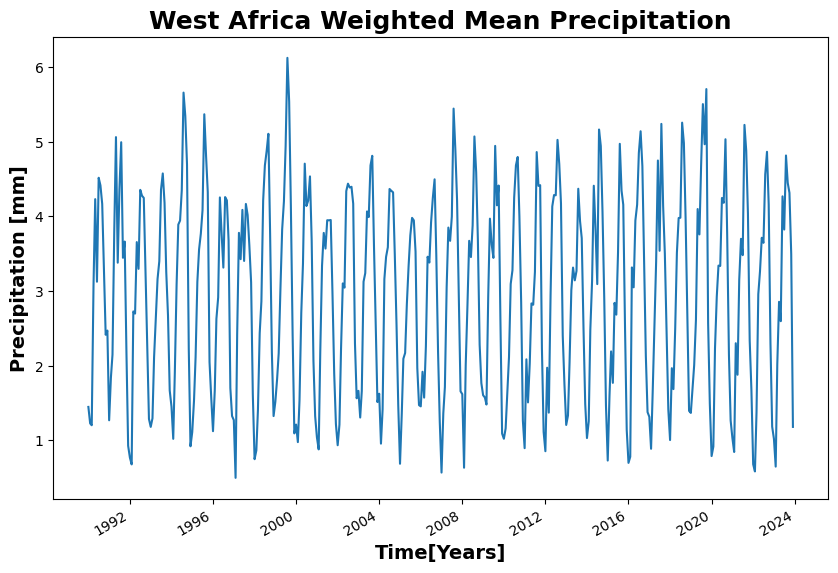

In [6]:
#selecitng the region
west_africa_tp = precip.sel(longitude = slice(-20, 16), latitude = slice(18, -1))

# Calculate weights
weights = np.cos(np.deg2rad(west_africa_tp['tp'].latitude))
weights.name = "weights"

# Apply weights to the dataset
tp_weighted1 = west_africa_tp['tp'].weighted(weights)

# Calculate the weighted mean
tp_mean1 = tp_weighted1.mean(["longitude", "latitude"])*1000

# Plot the mean using a line plot
plt.figure(figsize=(10, 6))
tp_mean1.plot()
plt.title('West Africa Weighted Mean Precipitation', fontweight='bold', fontsize = '18')
plt.xlabel('Time[Years]', fontweight='bold', fontsize = '14')
plt.ylabel('Precipitation [mm]', fontweight='bold', fontsize = '14')
plt.show()

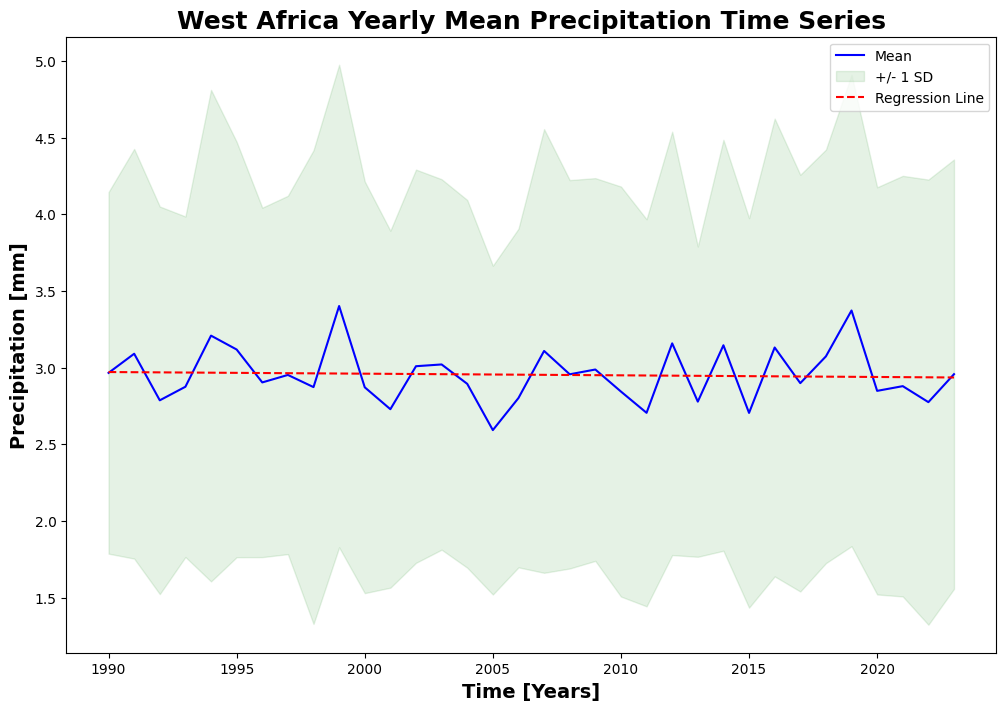

In [7]:

# Calculate mean
tp_yearly1 = tp_mean1.groupby('time.year').mean()

# Calculate standard deviation
std1 = tp_mean1.groupby('time.year').std()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(tp_yearly1.year, tp_yearly1, color='blue', label='Mean')

ax.fill_between(tp_yearly1.year, (tp_yearly1 + std1), (tp_yearly1 - std1), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for regression
years = tp_yearly1.year.values
values = tp_yearly1.values
slope, intercept = np.polyfit(years, values, 1)
regression_line = slope * years + intercept

# Plot regression line
ax.plot(years, regression_line, color='red', linestyle='--', label='Regression Line')

plt.title('West Africa Yearly Mean Precipitation Time Series', fontweight='bold', fontsize =  '18')
plt.ylabel('Precipitation [mm]', fontweight='bold', fontsize =  '14')
plt.xlabel('Time [Years]', fontweight='bold', fontsize =  '14')
plt.legend()

plt.show()


## Bar chart to visualize the time series of anomalies

In [19]:
tp_subset = tp_yearly1.where((tp_yearly1.year > 1990) & (tp_yearly1.year < 2021), drop=True)
tp_clim = tp_subset.mean()
tp_anom = tp_yearly1 - tp_clim

df = tp_anom.to_dataframe()
df['positive'] = df['tp'] > 0
df.tail() # show only first five rows


tp  positive
year                    
2019  0.411327      True
2020 -0.113019     False
2021 -0.082240     False
2022 -0.186622     False
2023 -0.004153     False

Text(0, 0.5, 'Precipitation [mm]')

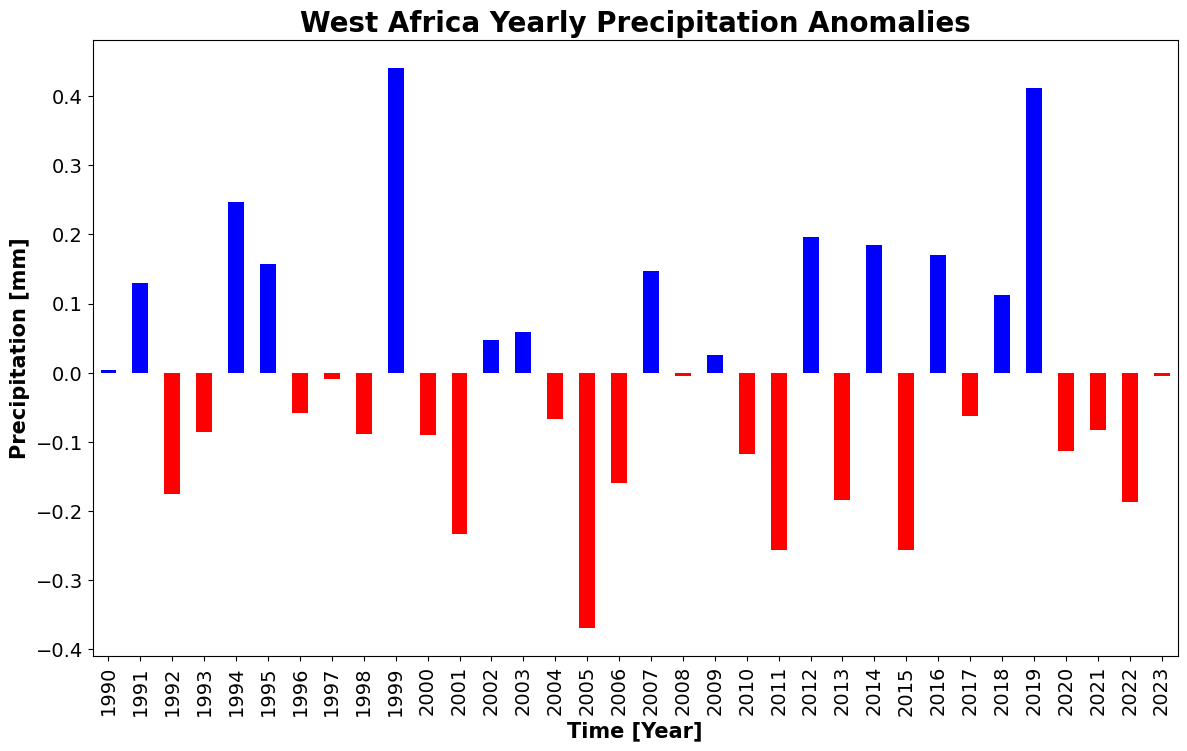

In [20]:
plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['tp'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'blue', False: 'red'}),
    fontsize=14
)

# Set the title 
ax.set_title('West Africa Yearly Precipitation Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize='15')
ax.set_ylabel('Precipitation [mm]', fontweight='bold', fontsize='15')
#plt.savefig(f'{DATADIR}Arctic_t2m_anom_bar.png') #(reference period 1991-2020)

## Rolling mean Time Series Plots

In [49]:
precip = precip.sel(time=slice('1990-01-01', '2023-12-01'))

In [50]:
# calculate normalized weights
_, lat_field = np.meshgrid(precip.longitude.values, precip.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(precip.tp)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the tp
precip['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[precip.latitude.values, precip.longitude.values], dims=['latitude', 'longitude'])
precip['tp_norma'] = precip.tp * precip.weight_normalized

# calculate the global values
precip_m = precip.tp_norma.sum(dim=['latitude', 'longitude'])

# calculate the 12-month rolling mean
precip_mean_rolling = precip_m.rolling(time=12, center=True).mean().dropna('time')*1000

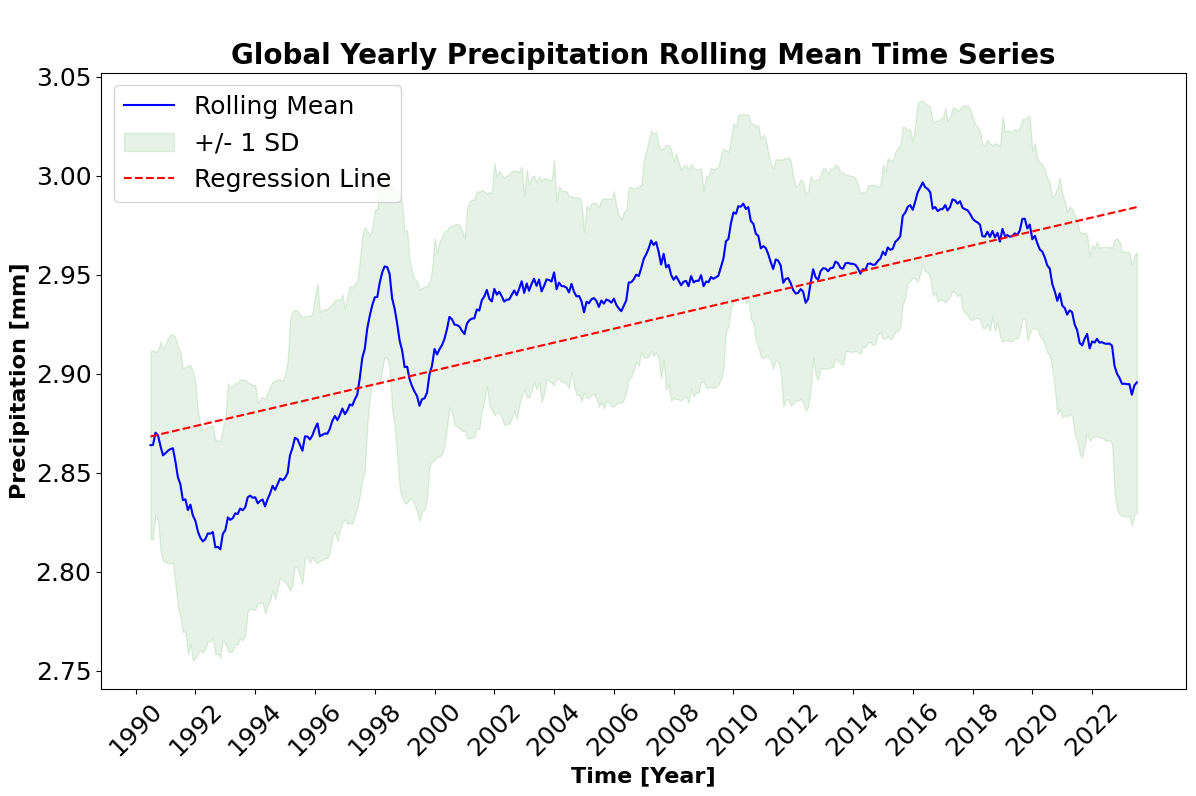

In [12]:

# calculate normalized weights
_, lat_field = np.meshgrid(precip.longitude.values, precip.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(precip.tp)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the tp
precip['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[precip.latitude.values, precip.longitude.values], dims=['latitude', 'longitude'])
precip['tp_norma'] = precip.tp * precip.weight_normalized

# calculate the global values
precip_m = precip.tp_norma.sum(dim=['latitude', 'longitude'])

# calculate the 12-month rolling mean
precip_mean_rolling = precip_m.rolling(time=12, center=True).mean().dropna('time') * 1000

# calculate standard deviation
std_r = precip_m.rolling(time=12, center=True).std().dropna('time') * 1000

# plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(precip_mean_rolling.time, precip_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(precip_mean_rolling.time, (precip_mean_rolling + std_r), (precip_mean_rolling - std_r), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array([np.datetime64(t).astype(float) for t in precip_mean_rolling.time.values])  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, precip_mean_rolling.values, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(precip_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('\nGlobal Yearly Precipitation Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Precipitation [mm]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

# Custom x-ticks
dateStart = pd.to_datetime('1990-01-01', format='%Y-%m-%d')
date_End = pd.to_datetime('2023-12-01', format='%Y-%m-%d')
dates_rng = pd.date_range(dateStart, date_End, freq='2YS')
plt.xticks(dates_rng, [dt.strftime('%Y') for dt in dates_rng], rotation=45)

# Save the plot if desired
# plt.savefig('./Example_2_olr_timeserie_Globe.png', dpi=500, bbox_inches='tight')

plt.show()


## Rolling Mean Time Series for West Africa

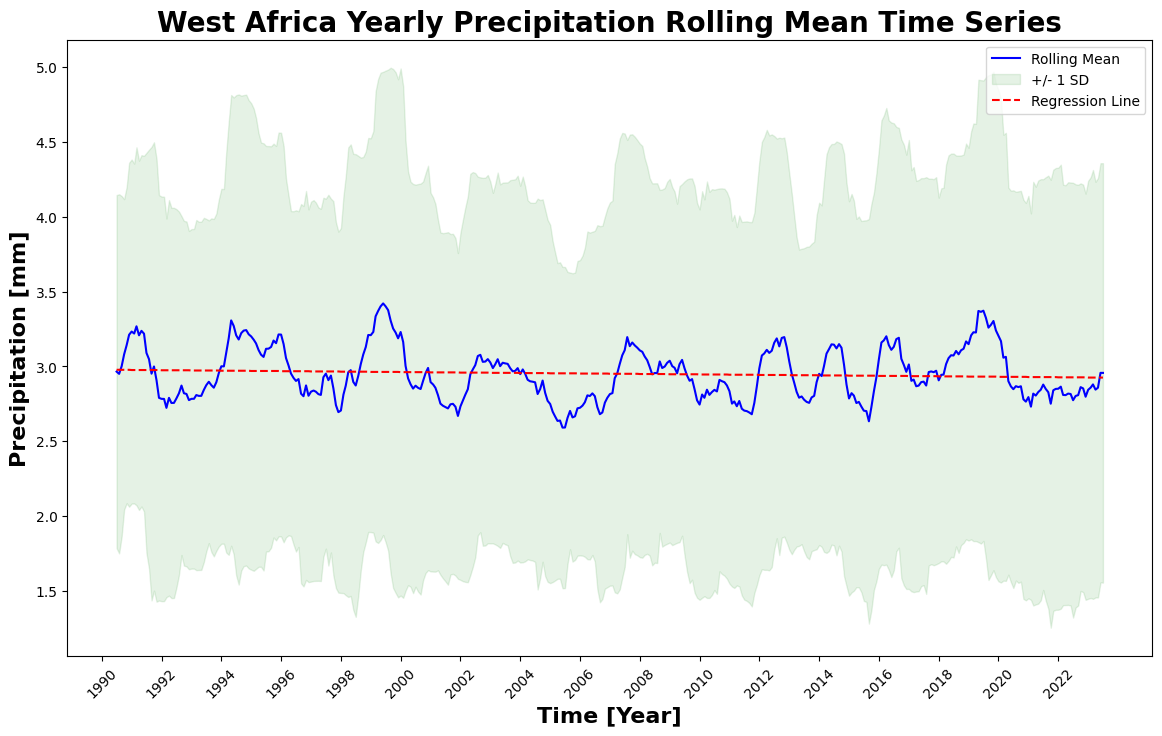

In [4]:

# Slicing data for West Africa
west_tp = precip.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_tp.longitude.values, west_tp.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_tp.tp)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Apply weights to the precipitation data
west_tp['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_tp.latitude.values, west_tp.longitude.values], dims=['latitude', 'longitude'])
west_tp['tp_norma'] = west_tp.tp * west_tp.weight_normalized

# Calculate the global values
west_tp_m = west_tp.tp_norma.sum(dim=['latitude', 'longitude'])

# Calculate the 12-month rolling mean and standard deviation, multiplied by 1000 for unit conversion if needed
west_tp_mean_rolling = west_tp_m.rolling(time=12, center=True).mean().dropna('time') * 1000
std_rr = west_tp_m.rolling(time=12, center=True).std().dropna('time') * 1000

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(west_tp_mean_rolling.time, west_tp_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_tp_mean_rolling.time, (west_tp_mean_rolling + std_rr), (west_tp_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array(west_tp_mean_rolling.time.values, dtype='datetime64[Y]').astype(float)  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_tp_mean_rolling, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_tp_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('West Africa Yearly Precipitation Rolling Mean Time Series', fontweight='bold', fontsize='20')
plt.ylabel("Precipitation [mm]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

# Custom x-ticks
dateStart = pd.to_datetime('1990-01-01', format='%Y-%m-%d')
date_End = pd.to_datetime('2023-12-01', format='%Y-%m-%d')
dates_rng = pd.date_range(dateStart, date_End, freq='2YS')
plt.xticks(dates_rng, [dtz.strftime('%Y') for dtz in dates_rng], rotation=45)


plt.show()


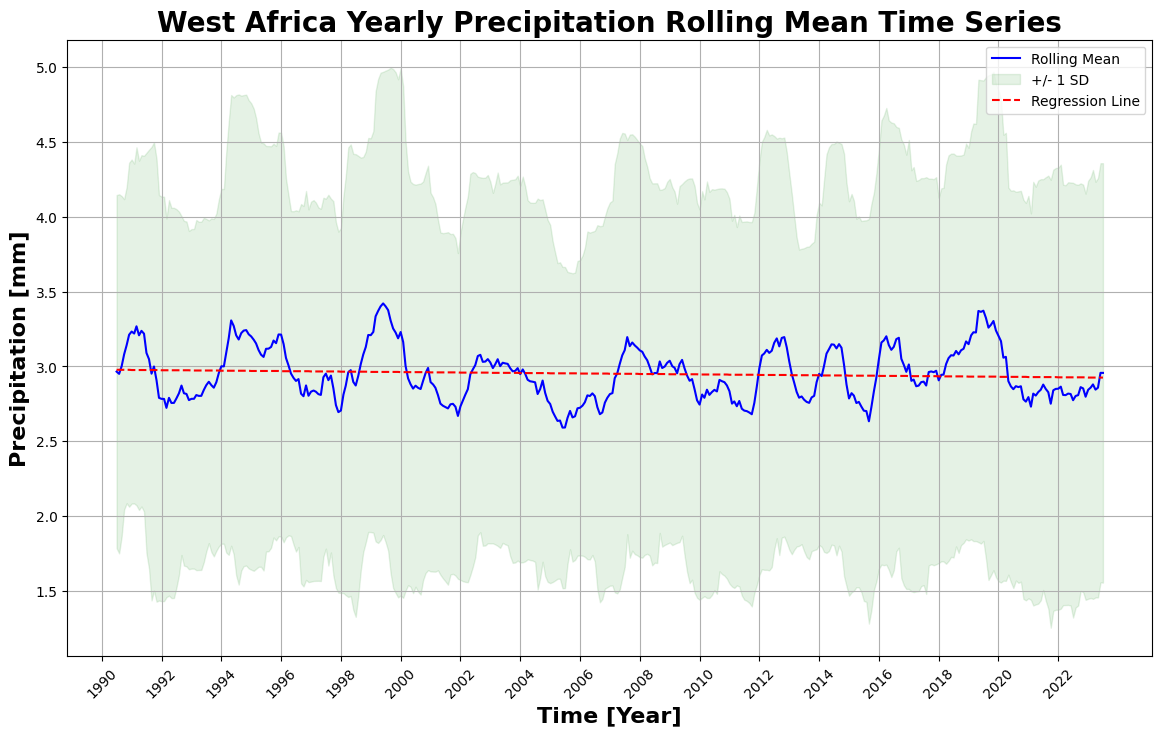

In [3]:

# Slicing data for West Africa
west_tp = precip.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_tp.longitude.values, west_tp.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_tp.tp)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Apply weights to the precipitation data
west_tp['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_tp.latitude.values, west_tp.longitude.values], dims=['latitude', 'longitude'])
west_tp['tp_norma'] = west_tp.tp * west_tp.weight_normalized

# Calculate the global values
west_tp_m = west_tp.tp_norma.sum(dim=['latitude', 'longitude'])

# Calculate the 12-month rolling mean and standard deviation, multiplied by 1000 for unit conversion if needed
west_tp_mean_rolling = west_tp_m.rolling(time=12, center=True).mean().dropna('time') * 1000
std_rr = west_tp_m.rolling(time=12, center=True).std().dropna('time') * 1000

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(west_tp_mean_rolling.time, west_tp_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_tp_mean_rolling.time, (west_tp_mean_rolling + std_rr), (west_tp_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for the regression line
time_encoded = np.array(west_tp_mean_rolling.time.values, dtype='datetime64[Y]').astype(float)  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_tp_mean_rolling, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_tp_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('West Africa Yearly Precipitation Rolling Mean Time Series', fontweight='bold', fontsize='20')
plt.ylabel("Precipitation [mm]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

# Custom x-ticks
dateStart = pd.to_datetime('1990-01-01', format='%Y-%m-%d')
date_End = pd.to_datetime('2023-12-01', format='%Y-%m-%d')
dates_rng = pd.date_range(dateStart, date_End, freq='2YS')
plt.xticks(dates_rng, [dtz.strftime('%Y') for dtz in dates_rng], rotation=45)

plt.grid()

plt.show()


## Daily time series comparing between 2022 and 2023

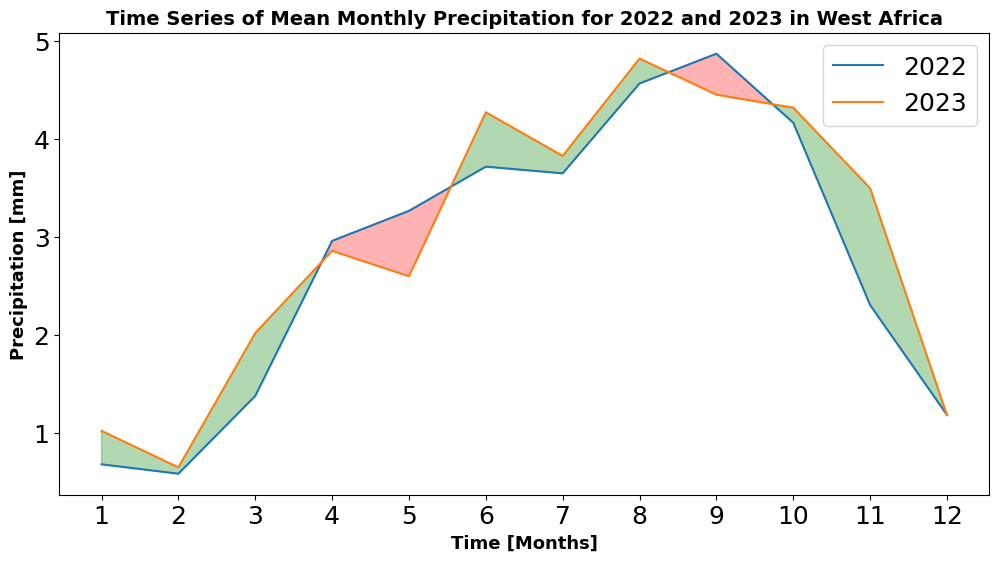

In [69]:

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#extracting data for westa frica
west_tp = precip.sel(longitude = slice(-20, 16), latitude = slice(18, -1))

# 'west_tp' and necessary transformations have already been loaded 
weights = np.cos(np.deg2rad(west_tp.latitude))
weights.name = "weights"
west_tp_weighted = west_tp.weighted(weights)

# Calculate mean over the region
WestAfrica_tp = west_tp_weighted.mean(["longitude", "latitude"])

# Select the year 2022 and 2023
WestAfrica_2022 = WestAfrica_tp.sel(time=slice('2022-01-01', '2022-12-31'))
WestAfrica_2023 = WestAfrica_tp.sel(time=slice('2023-01-01', '2023-12-31'))

# Group by month and calculate mean precipitation for each month for both years
WestAfrica_2022_tp = WestAfrica_2022.groupby('time.month').mean()*1000
WestAfrica_2023_tp = WestAfrica_2023.groupby('time.month').mean()*1000

# Extracting precipitation values correctly for both years
precipitation_2022 = WestAfrica_2022_tp.tp.values  # Accessing the 'tp' data variable for 2022
precipitation_2023 = WestAfrica_2023_tp.tp.values  # Accessing the 'tp' data variable for 2023

# Now, prepare to plot
months = np.arange(1, 13)  # Months from January to December

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(months, precipitation_2022, label='2022')  # Plot for 2022
ax.plot(months, precipitation_2023, label='2023')  # Plot for 2023
ax.set_title('Time Series of Mean Monthly Precipitation for 2022 and 2023 in West Africa', fontweight='bold', fontsize='14')
ax.set_ylabel('Precipitation [mm]', fontweight='bold', fontsize='13')
ax.set_xlabel('Time [Months]', fontweight='bold', fontsize='13')
ax.set_xticks(months)  # Set x-ticks to show each month


# Fill between plots with interpolation
ax.fill_between(months, precipitation_2022, precipitation_2023, where=(precipitation_2023 > precipitation_2022), color='green', alpha=0.3, interpolate=True)
ax.fill_between(months, precipitation_2022, precipitation_2023, where=(precipitation_2023 <= precipitation_2022), color='red', alpha=0.3, interpolate=True)

ax.legend()  # Add a legend to differentiate the years and conditions

plt.show()

## Probability Density Plots

In [4]:
#load the dataset

dq = xr.open_dataset('era5_large_data.nc')
dq

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 4048)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2023-03-01T01:00:00 ... 2023-08-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-20 10:11:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [5]:
#load the dataset
dr = xr.open_dataset('era5_large_data2.nc')
dr


<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 4416)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2022-03-01 ... 2022-08-31T23:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-20 13:02:15 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

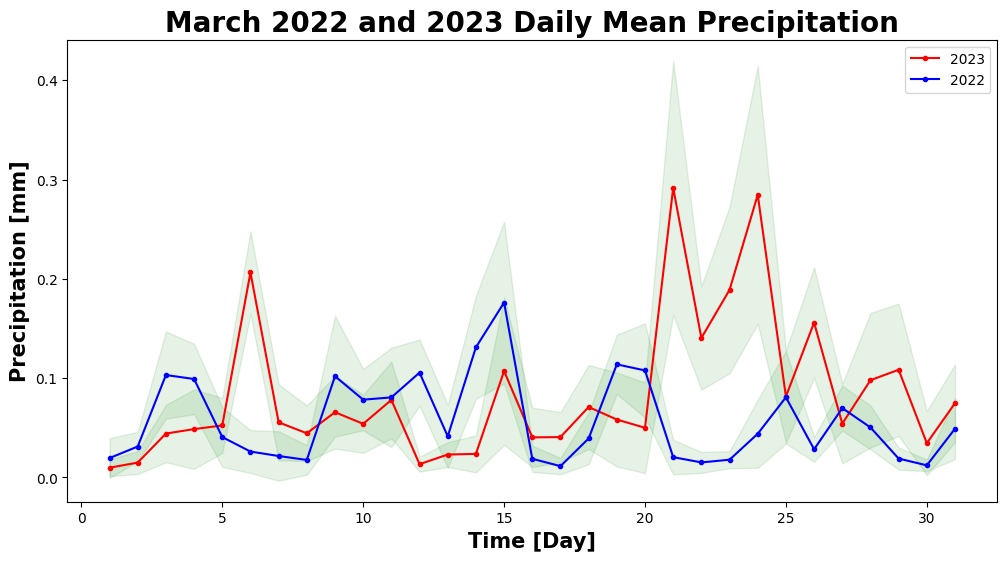

In [7]:

dqq = dq['tp']  # data for 2023
drr = dr['tp']  # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2023 data for West Africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2022 data for West Africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up a single plot for March 2023 and 2022
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for March 2023 and 2022
month = 3  # March
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)

# Calculating daily mean and standard deviation for 2022 and 2023
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting title and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight = 'bold', fontsize = '20')
ax.set_xlabel('Time [Day]', fontweight = 'bold', fontsize = '15')
ax.set_ylabel('Precipitation [mm]', fontweight = 'bold', fontsize = '15')
ax.legend()

plt.show()


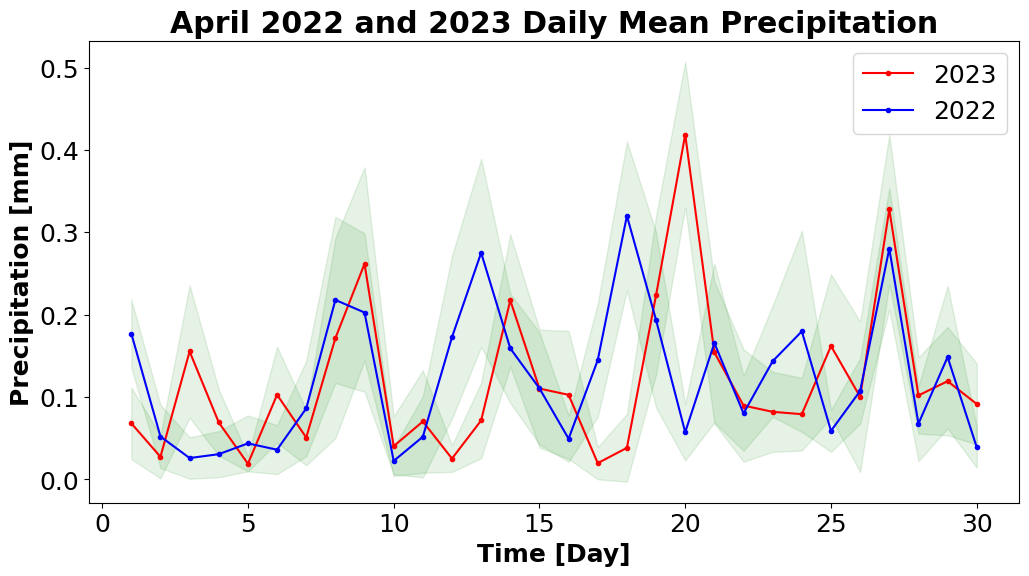

In [38]:

dqq = dq['tp']  # data for 2023
drr = dr['tp']  # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2023 data for West Africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2022 data for West Africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up a single plot for April
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for April 2023
month = 4  # April
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)

# Select data for April 2022
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)

# Calculating daily mean and standard deviation for 2022 and 2023
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data with standard deviation shading
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting title and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
ax.set_xlabel('Time [Day]', fontweight='bold')
ax.set_ylabel('Precipitation [mm]', fontweight='bold')
ax.legend()

plt.show()


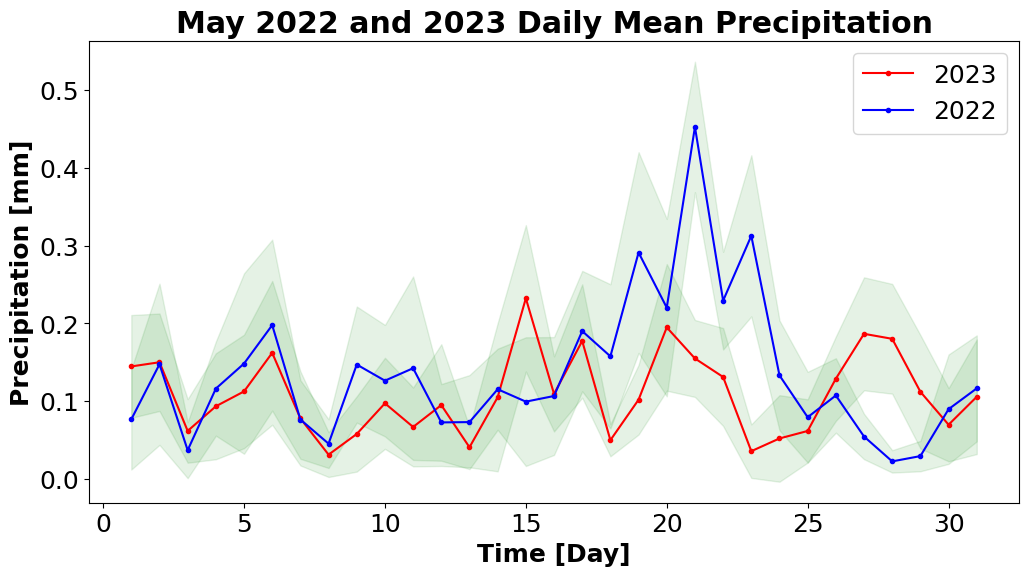

In [39]:

dqq = dq['tp'] # data for 2023
drr = dr['tp'] # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1)) # selection of 2023 data for West Africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1)) # selection of 2022 data for West Africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up a single plot for May
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for May 2023
month = 5  # May
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)

# Select data for May 2022
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)

# Calculating daily mean and standard deviation for 2022 and 2023
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data with standard deviation shading
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting title and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
ax.set_xlabel('Time [Day]', fontweight='bold')
ax.set_ylabel('Precipitation [mm]', fontweight='bold')
ax.legend()

plt.show()


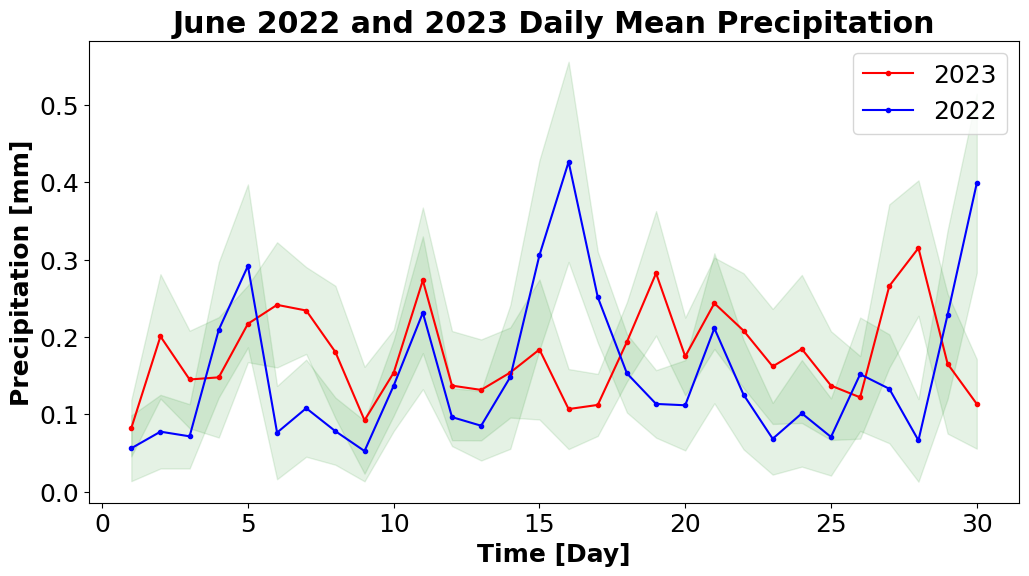

In [40]:

dqq = dq['tp'] # data for 2023
drr = dr['tp'] # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1)) # selection of 2023 data for West Africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1)) # selection of 2022 data for West Africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up a single plot for June
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for June 2023 
month = 6  # June
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)

# Select data for June 2022
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)

# Calculating daily mean and standard deviation for 2022 and 2023
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data with standard deviation shading
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting title and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
ax.set_xlabel('Time [Day]', fontweight='bold')
ax.set_ylabel('Precipitation [mm]', fontweight='bold')
ax.legend()

plt.show()


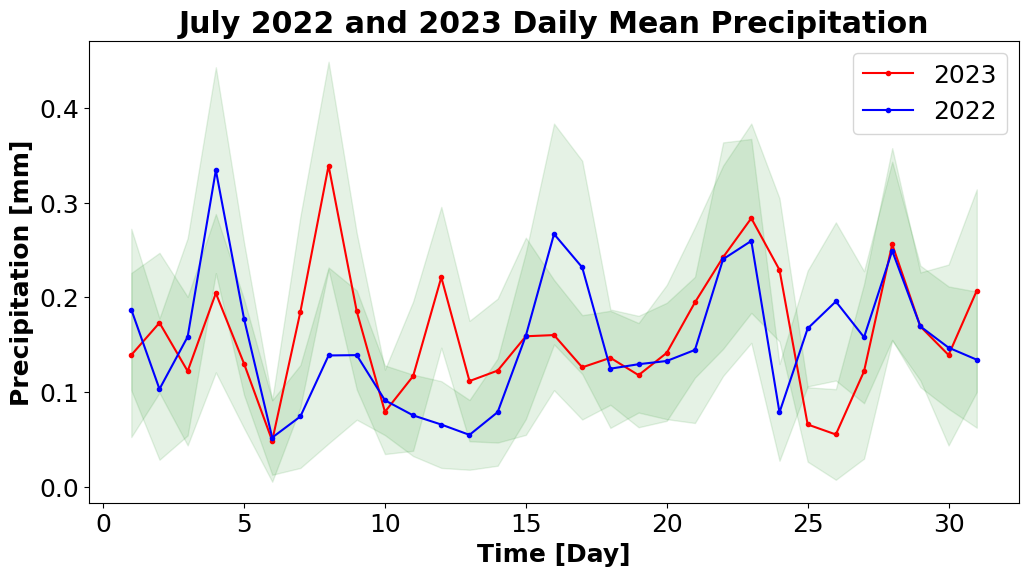

In [41]:

dqq = dq['tp']  # data for 2023
drr = dr['tp']  # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2023 data for West Africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2022 data for West Africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up a single plot for July
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for July 2023 
month = 7  # July
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)
days = month_data.time.dt.day  # Extract day for x-axis

# Select data for July 2022
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)
days1 = month_data1.time.dt.day  # Extract day for x-axis

# Calculating daily mean and standard deviation for 2022 and 2023
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data with standard deviation shading
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting title and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
ax.set_xlabel('Time [Day]', fontweight='bold')
ax.set_ylabel('Precipitation [mm]', fontweight='bold')
ax.legend()

plt.show()


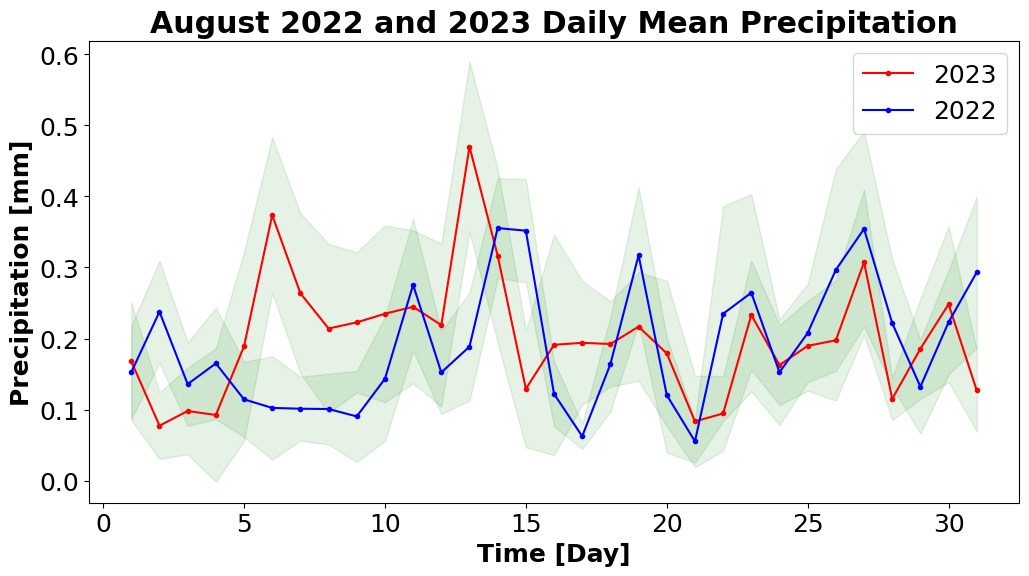

In [42]:

dqq = dq['tp']  # data for 2023
drr = dr['tp']  # data for 2022

# Selection of data for West Africa for both years
west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1))
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Apply latitude weighting for more accurate area representation for both years
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# Set up the plot for August
fig, ax = plt.subplots(figsize=(12, 6))

# Select data for August 2023
month = 8  # August
month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month)

# Select data for August 2022
month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month)

# Calculating daily mean and standard deviation for both years
daily_mean = month_data.groupby('time.day').mean() * 1000
daily_std = month_data.groupby('time.day').std() * 1000
daily_mean1 = month_data1.groupby('time.day').mean() * 1000
daily_std1 = month_data1.groupby('time.day').std() * 1000

# Plotting the data with standard deviation shading
ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
ax.fill_between(daily_mean.day, daily_mean - daily_std, daily_mean + daily_std, color='green', alpha=0.1)
ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
ax.fill_between(daily_mean1.day, daily_mean1 - daily_std1, daily_mean1 + daily_std1, color='green', alpha=0.1)

# Setting titles and labels
month_name = calendar.month_name[month]
ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
ax.set_xlabel('Time [Day]', fontweight='bold')
ax.set_ylabel('Precipitation [mm]', fontweight='bold')
ax.legend()

plt.show()


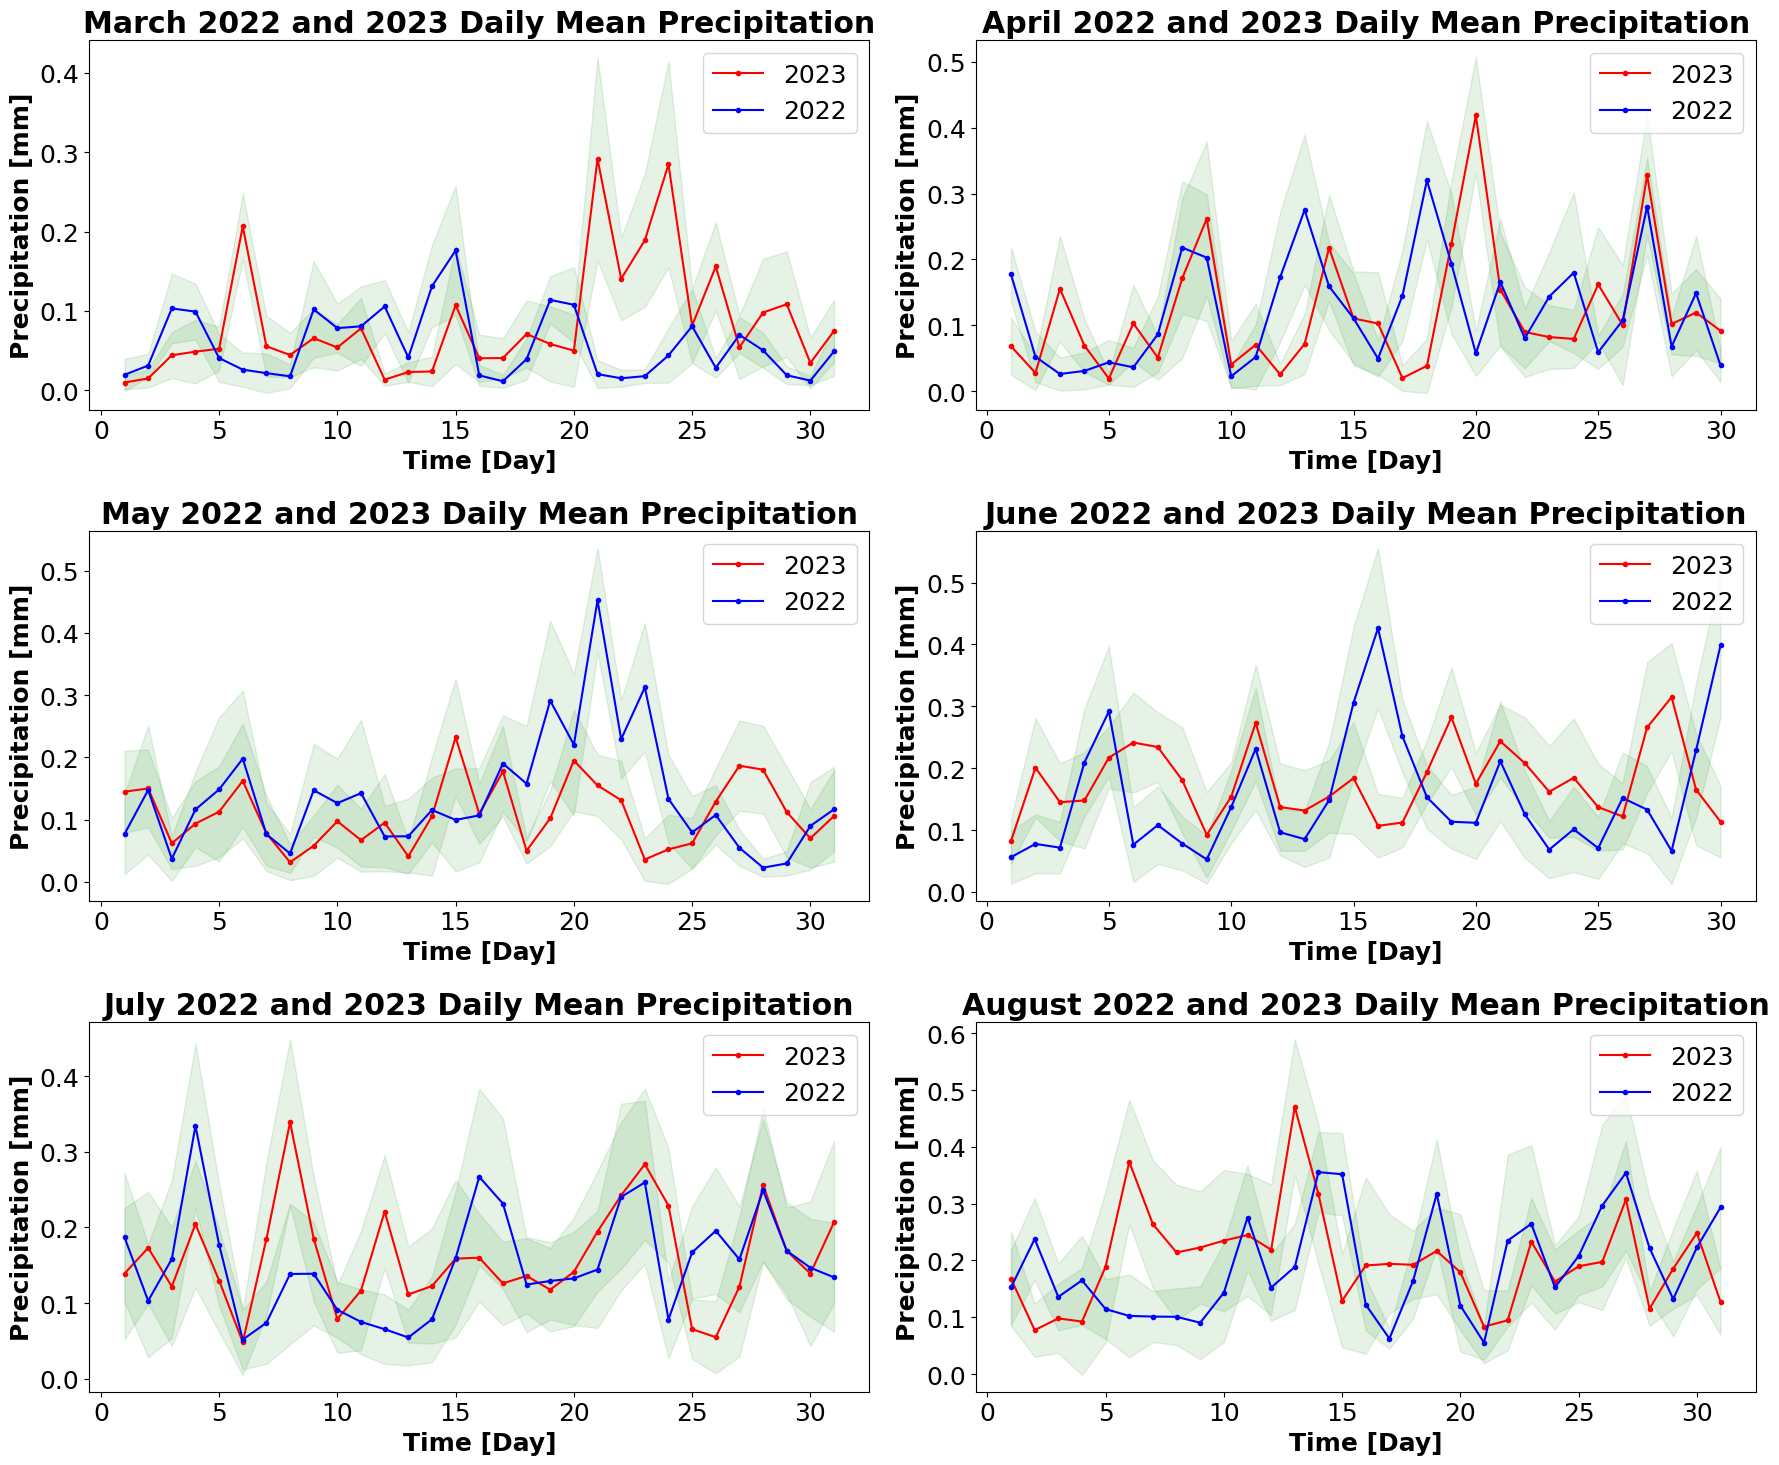

In [35]:


# Define a function to create the plot for each month
def plot_month(ax, month_data, month_data1, month_name):
    # Calculating daily mean and standard deviation for 2022 and 2023
    daily_mean = month_data.groupby('time.day').mean() * 1000
    daily_std = month_data.groupby('time.day').std() * 1000
    daily_mean1 = month_data1.groupby('time.day').mean() * 1000
    daily_std1 = month_data1.groupby('time.day').std() * 1000

    # Plotting the data
    ax.plot(daily_mean.day, daily_mean, marker='.', linestyle='-', color='r', label='2023')
    ax.fill_between(daily_mean.day, (daily_mean + daily_std), (daily_mean - daily_std), color='green', alpha=0.1)  # Shaded area for 2023
    ax.plot(daily_mean1.day, daily_mean1, marker='.', linestyle='-', color='b', label='2022')
    ax.fill_between(daily_mean1.day, (daily_mean1 + daily_std1), (daily_mean1 - daily_std1), color='green', alpha=0.1)  # Shaded area for 2022

    ax.set_title(f'{month_name} 2022 and 2023 Daily Mean Precipitation', fontweight='bold')
    ax.set_xlabel('Time [Day]', fontweight='bold')
    ax.set_ylabel('Precipitation [mm]', fontweight='bold')
    ax.legend()

dqq = dq['tp']  # data for 2023
drr = dr['tp']  # data for 2022

west_ds_tp = dqq.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2023 data for west africa
west_dr_tp = drr.sel(longitude=slice(-20, 16), latitude=slice(18, -1))  # selection of 2022 data for west africa

# Apply latitude weighting for more accurate area representation for 2023
weights = np.cos(np.deg2rad(west_ds_tp.latitude))
weights.name = "weights"
west_ds_tp_weighted = west_ds_tp.weighted(weights)
West_tp = west_ds_tp_weighted.mean(["longitude", "latitude"])

# Apply latitude weighting for more accurate area representation for 2022
weights1 = np.cos(np.deg2rad(west_dr_tp.latitude))
weights1.name = "weights1"
west_dr_tp_weighted = west_dr_tp.weighted(weights1)
West_tp_dr = west_dr_tp_weighted.mean(["longitude", "latitude"])

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Create a 2 by 3 subplot layout
fig, axs = plt.subplots(3, 2, figsize=(18, 15))  # Adjusted for more vertical space

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    month_num = i + 3  # Month number (March starts from 3)
    
    # Select data for the current month in 2023
    month_data = West_tp.sel(time=West_tp.time.dt.year == 2023).sel(time=West_tp.time.dt.month == month_num)
    
    # Select data for the current month in 2022
    month_data1 = West_tp_dr.sel(time=West_tp_dr.time.dt.year == 2022).sel(time=West_tp_dr.time.dt.month == month_num)
    
    # Get the month name
    month_name = calendar.month_name[month_num]
    
    # Plot on the corresponding subplot
    plot_month(axs[row, col], month_data, month_data1, month_name)

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.4)  # Adjust horizontal spacing
plt.tight_layout()
plt.show()


## Density Plot for 2022 and 2023

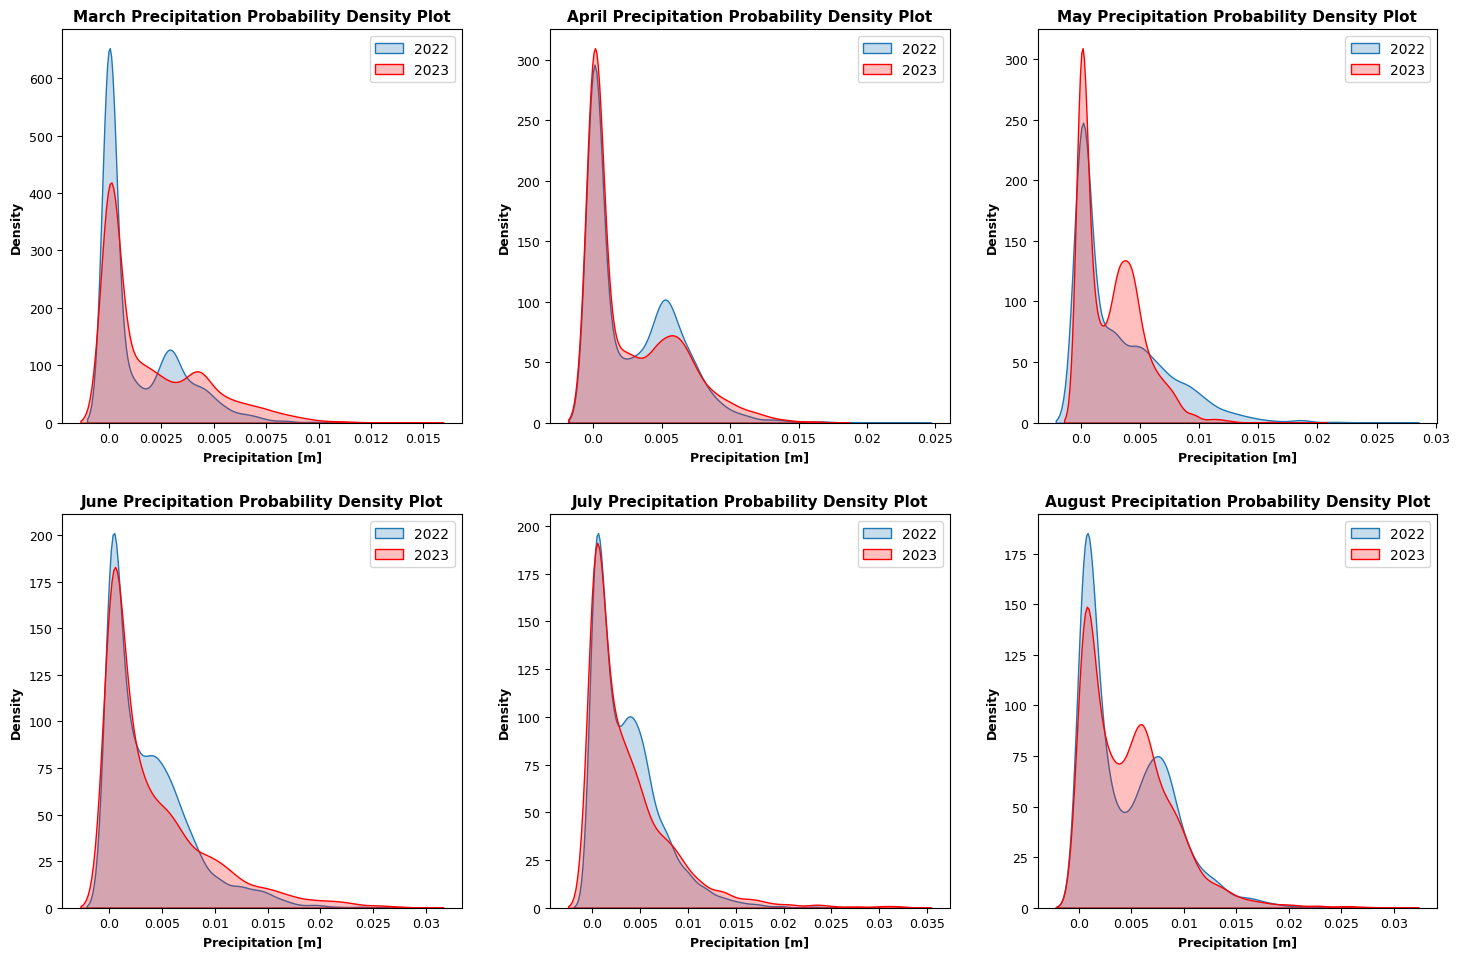

In [43]:
import matplotlib.ticker as ticker

#selecting the region
west_tp = precip.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Set up the plot - 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define colors for the two years
colors = ['#1f77b4', '#ff0000']  # Blue for 2022, Red for 2023

# Iterate over the selected months
for i, month in enumerate(range(3, 9)):
    # Determine the last day of the current month
    last_day = calendar.monthrange(2022, month)[1]
    
    # Select precipitation data for the current month and both years
    precip_2022 = west_tp['tp'].sel(time=slice(f'2022-{month:02d}-01', f'2022-{month:02d}-{last_day:02d}'))
    precip_2023 = west_tp['tp'].sel(time=slice(f'2023-{month:02d}-01', f'2023-{month:02d}-{last_day:02d}'))
    
    # Convert to pandas DataFrame for seaborn compatibility
    df_2022 = precip_2022.to_dataframe().reset_index()
    df_2023 = precip_2023.to_dataframe().reset_index()
    
    # Plot the density plots for both years on the same subplot
    sns.kdeplot(data=df_2022, x="tp", ax=axes[i], fill=True, color=colors[0], label='2022')
    sns.kdeplot(data=df_2023, x="tp", ax=axes[i], fill=True, color=colors[1], label='2023')
    
    # Setting the title for each subplot with month name
    month_name = calendar.month_name[month]
    axes[i].set_title(f'{month_name} Precipitation Probability Density Plot', fontweight='bold', fontsize=11)
    axes[i].legend(fontsize = 10)

    # Set axis labels and make them bold
    axes[i].set_xlabel('Precipitation [m]', fontsize=9, fontweight='bold')
    axes[i].set_ylabel('Density', fontsize=9, fontweight='bold')
    
     # Format the x-axis labels for better readability
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2}'))
    axes[i].tick_params(axis='x', labelsize=9)  # Adjust the x-axis tick label size
    axes[i].tick_params(axis='y', labelsize=9)  # Adjust the y-axis tick label size

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Density Plot for 1993, 2003, 2013, 2022 and 2023

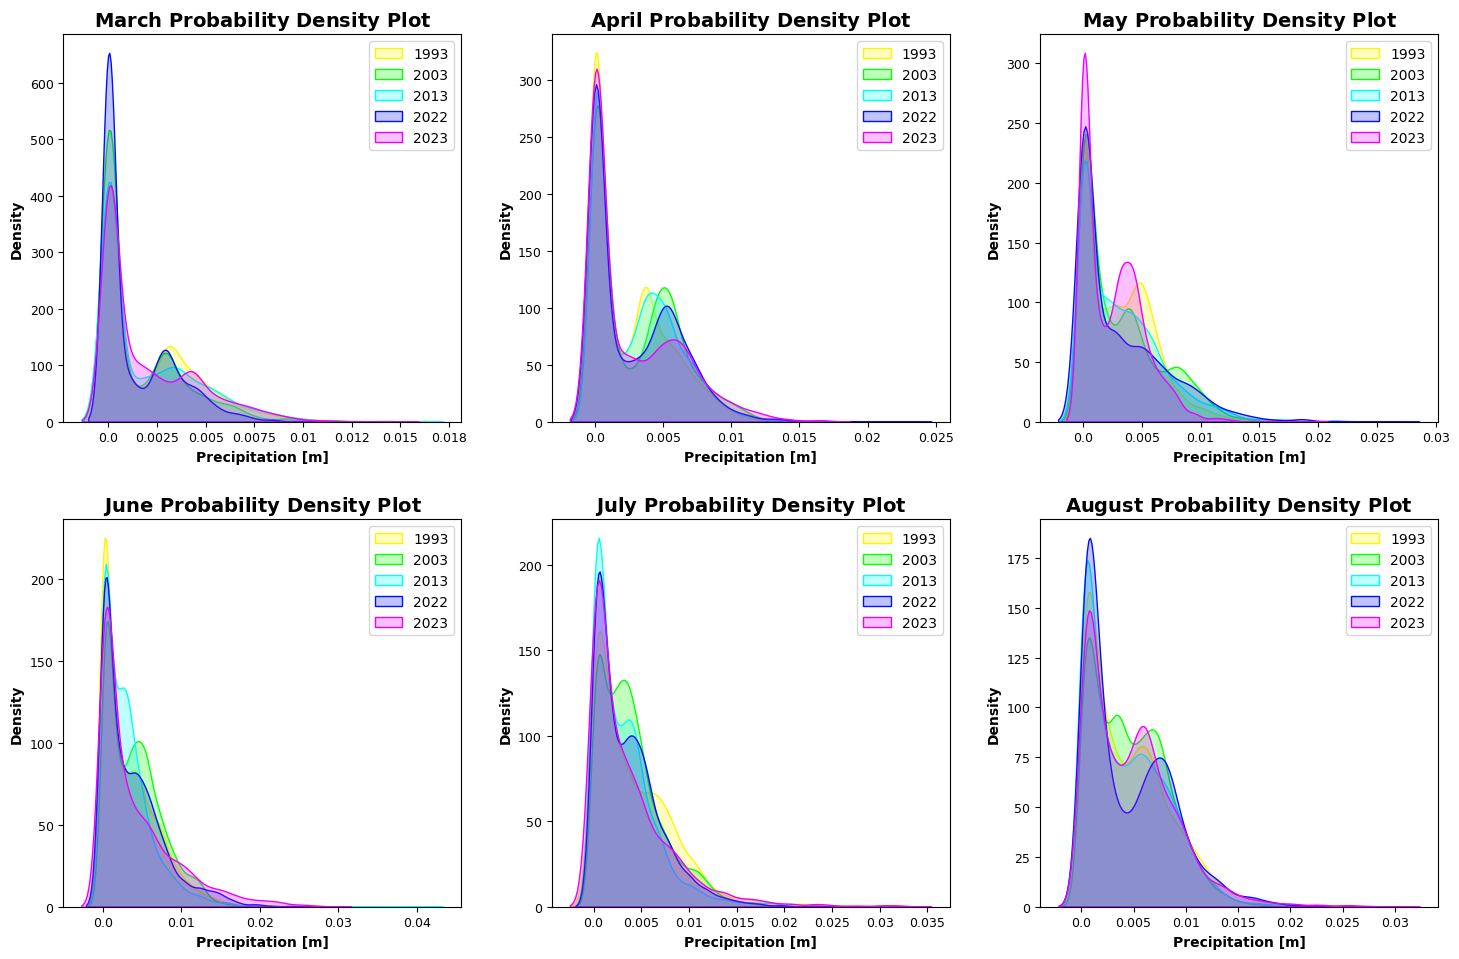

In [44]:
import matplotlib.ticker as ticker

# selecting the data
west_tp = precip.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Define the time periods of interest
time_periods = [
    ('1993-03-01', '1993-08-31'),
    ('2003-03-01', '2003-08-31'),
    ('2013-03-01', '2013-08-31'),
    ('2022-03-01', '2022-08-31'),
    ('2023-03-01', '2023-08-31')
]

# Set up the plot - 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Define colors for each year
colors = sns.color_palette('hsv', len(time_periods))

# Iterate over each month and create density plots
for idx, month_num in enumerate(range(3, 9)):
    # Get the name of the month
    month_name = calendar.month_name[month_num]

    # Select data for the month
    monthly_data = west_tp['tp'].sel(time=west_tp['tp'].time.dt.month == month_num)

    # Plot all years for the current month
    for period, color in zip(time_periods, colors):
        # Select precipitation data for the time period
        precip_data = monthly_data.sel(time=slice(period[0], period[1]))

        # Convert to pandas DataFrame for seaborn compatibility
        df = precip_data.to_dataframe().reset_index()
        

        # Plot the density plot with color distinction
        sns.kdeplot(data=df, x="tp", ax=axes[idx//3, idx%3], fill=True, color=color, label=period[0][:4])

         # Setting the title for each subplot with bold month name
        axes[idx//3, idx%3].set_title(f'$\mathbf{{{month_name}}}$ Probability Density Plot', fontsize=14, fontweight='bold')  # Using LaTeX for bolding
        axes[idx//3, idx%3].legend(fontsize=10)  # Adjust the legend font size

        # Set axis labels and make them bold
        axes[idx//3, idx%3].set_xlabel('Precipitation [m]', fontsize=10, fontweight='bold')
        axes[idx//3, idx%3].set_ylabel('Density', fontsize=10, fontweight='bold')

        # Format the x-axis labels for better readability
        axes[idx//3, idx%3].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2}'))
        axes[idx//3, idx%3].tick_params(axis='x', labelsize=9)  # Adjust the x-axis tick label size
        axes[idx//3, idx%3].tick_params(axis='y', labelsize=9)  # Adjust the y-axis tick label size

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Suppress FutureWarning
warnings.filterwarnings("ignore", message="use_inf_as_na is deprecated")
